In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import neurd

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
from mesh_tools import trimesh_utils as tu
from datasci_tools import ipyvolume_utils as ipvu
from neurd import neuron_visualizations as nviz

In [4]:
segment_id = 864691134917511946

# Load the appropriate volume data inferface object

In [51]:
from neurd.vdi_microns import volume_data_interface as vdi
vdi.set_parameters_for_directory_modules()

In [6]:
synapse_filepath = str(Path(f'./{segment_id}_synapses.csv').absolute())
synapse_filepath

'/neurd_packages/NEURD/Applications/autoproof_neuron_pipeline/864691134917511946_synapses.csv'

In [7]:
from datasci_tools import pandas_utils as pu
df = pu.csv_to_df(synapse_filepath)
df

,segment_id,segment_id_secondary,synapse_id,prepost,synapse_x,synapse_y,synapse_z,synapse_size
0,864691134917511946,864691131890533202,74184144,postsyn,130294,142230,26219,440
1,864691134917511946,864691131971669827,75022036,postsyn,129722,172364,24745,8428
2,864691134917511946,864691132108273063,70508178,postsyn,129296,134025,26165,26588
3,864691134917511946,864691132292869029,104897939,postsyn,145174,190248,26715,4500
4,864691134917511946,864691132404296761,67503404,postsyn,126052,183560,25913,2396
...,...,...,...,...,...,...,...,...
2310,864691134917511946,864691137019576686,92314268,postsyn,136376,184538,26155,5916
2311,864691134917511946,864691137196931393,78527771,postsyn,130688,192222,24419,15896
2312,864691134917511946,864691137196956737,105192008,postsyn,143492,188714,25058,7820
2313,864691134917511946,864691137196956737,113437532,postsyn,147378,190346,25751,708


In [8]:
vdi.set_synapse_filepath(
    synapse_filepath
)

# Data Prep: Loading mesh

In [9]:
mesh = vdi.fetch_segment_id_mesh(
    segment_id,
    plot = True
)
mesh

/usr/local/lib/python3.8/dist-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  warnings.warn(


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

<trimesh.Trimesh(vertices.shape=(420741, 3), faces.shape=(865980, 3))>

In [10]:
from datasci_tools import pipeline

products = pipeline.PipelineProducts()
products

# Step 1: Decimation

In [11]:
"""
NOTE: an already decimated mesh is used for the example
in order to speed up time, that's why the mesh_dec
object will be overwritten with original mesh object
"""

"\nNOTE: an already decimated mesh is used for the example\nin order to speed up time, that's why the mesh_dec\nobject will be overwritten with original mesh object\n"

In [12]:
decimation_parameters = dict(
    decimation_ratio =0.25,
)

In [13]:
mesh_decimated = tu.decimate(
    mesh,
    **decimation_parameters
)

xvfb-run -n 6437 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_88727.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_88727_decimated.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/decimation_meshlab_25759060.mls


In [14]:
# saving any parameters used or output products for later use
products.set_stage_attrs(
    stage = "decimation",
    attr_dict = dict(
        decimation_parameters = decimation_parameters,
        segment_id = segment_id,
    ),
    
)

print(products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691134917511946,
  },
}



# Step 2: Soma Identification

In [15]:
from neurd import soma_extraction_utils as sm
soma_extraction_parameters = dict()

In [16]:
# could inspect the parameters of a certain category
from neurd import parameter_utils as paru
paru.category_param_from_module(
        module = sm,
        category = "glia",
)

{'glia_volume_threshold_in_um_global': 2500,
 'glia_n_faces_threshold_global': 400000,
 'glia_n_faces_min_global': 100000}

In [17]:
# overwritting decimated mesh because original was already decimated
mesh_decimated = mesh

In [18]:
from neurd import neuron_visualizations as nviz

verbose = True

soma_products = sm.soma_indentification(
    mesh_decimated,
    verbose=verbose,
    **soma_extraction_parameters
)

Current Arguments Using (adjusted for decimation):
 large_mesh_threshold= 5000.0 
large_mesh_threshold_inner = 3250.0 
soma_size_threshold = 562.5 
soma_size_threshold_max = 75000.0
outer_decimation_ratio = 0.25
inner_decimation_ratio = 0.25
max_mesh_sized_filtered_away = 22500.0
xvfb-run -n 9045 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_632.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_632_remove_interior.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/remove_interior_709100.mls
removed temporary input file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_632.off
removed temporary output file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_632_remove_interior.off
/neurd_packages/NEURD/Applications/Tuto

  0%|          | 0/13 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.779125]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 4439 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/neuron_662974.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/neuron_662974_poisson.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/poisson_833576.mls
removed temporary input file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/neuron_662974.off
removed temporary output file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/neuron_662974_poisson.off
mesh.is_watertight = True
/neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/poisson_833576.mls is being deleted....
Inside sp

  0%|          | 0/1 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.5418655]
mesh.is_watertight = True
/neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/poisson_235732.mls is being deleted....
Inside sphere validater: ratio_val = 769.5128726957494
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(767, 3), faces.shape=(1534, 3))>, curr_side_len_check = True, curr_volume_check = False
perc_0_faces = 0.0
Going to run cgal segmentation with:
File: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/73_mesh 
clusters:3 
smoothness:0.2

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

mesh.is_watertight = True
/neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/poisson_181542.mls is being deleted....
Inside sphere validater: ratio_val = 769.5128726957494
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(767, 3), faces.shape=(1534, 3))>, curr_side_len_check = True, curr_volume_check = False
----- working on mesh after poisson #2: <trimesh.Trimesh(vertices.shape=(2914, 3), faces.shape=(5824, 3))>
xvfb-run -n 810 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/de

  0%|          | 0/6 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.45577199999999995]
mesh.is_watertight = True
/neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/poisson_47282.mls is being deleted....
Inside sphere validater: ratio_val = 318.4759330340049
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(524, 3), faces.shape=(1040, 3))>, curr_side_len_check = True, curr_volume_check = False
perc_0_faces = 0.0019230769230769232
Going to run cgal segmentation with:
File: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/692_mesh 
clusters:3 
smoothness:0.2

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

mesh.is_watertight = True
/neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/poisson_634730.mls is being deleted....
Inside sphere validater: ratio_val = 318.4759330340049
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(524, 3), faces.shape=(1040, 3))>, curr_side_len_check = True, curr_volume_check = False
----- working on mesh after poisson #3: <trimesh.Trimesh(vertices.shape=(2561, 3), faces.shape=(5122, 3))>
xvfb-run -n 4819 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/d

  0%|          | 0/7 [00:00<?, ?it/s]


    --- On segmentation loop 1 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(210, 3), faces.shape=(418, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(210, 3), faces.shape=(418, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]


    --- On segmentation loop 2 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(127, 3), faces.shape=(252, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(127, 3), faces.shape=(252, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

----- working on mesh after poisson #4: <trimesh.Trimesh(vertices.shape=(2505, 3), faces.shape=(5006, 3))>
xvfb-run -n 8847 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/decimation_meshlab_25210105.mls

-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_12345_decimated_largest_piece_poisson_largest_inner.off

    --- On segmentation loop 0 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(627, 3), faces.shape=(1250, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(627, 3), faces.shape=(1250

  0%|          | 0/3 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.45000850000000003]
mesh.is_watertight = True
/neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/poisson_841711.mls is being deleted....
Inside sphere validater: ratio_val = 44.002011369429006
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(294, 3), faces.shape=(582, 3))>, curr_side_len_check = True, curr_volume_check = False
perc_0_faces = 0.0
Going to run cgal segmentation with:
File: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/672_mesh 
clusters:3 
smoothness:0.2

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

Could not find valid soma mesh in retry
----- working on mesh after poisson #5: <trimesh.Trimesh(vertices.shape=(2190, 3), faces.shape=(4376, 3))>
xvfb-run -n 3949 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/decimation_meshlab_25210105.mls

-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_12345_decimated_largest_piece_poisson_largest_inner.off

    --- On segmentation loop 0 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(549, 3), faces.shape=(1094, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(ve

  0%|          | 0/5 [00:00<?, ?it/s]


    --- On segmentation loop 1 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(230, 3), faces.shape=(454, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(230, 3), faces.shape=(454, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]


    --- On segmentation loop 2 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(108, 3), faces.shape=(207, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(108, 3), faces.shape=(207, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

----- working on mesh after poisson #6: <trimesh.Trimesh(vertices.shape=(2089, 3), faces.shape=(4174, 3))>
xvfb-run -n 4177 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/decimation_meshlab_25210105.mls

-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_12345_decimated_largest_piece_poisson_largest_inner.off

    --- On segmentation loop 0 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(523, 3), faces.shape=(1042, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(523, 3), faces.shape=(1042

  0%|          | 0/3 [00:00<?, ?it/s]


    --- On segmentation loop 1 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(265, 3), faces.shape=(523, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(265, 3), faces.shape=(523, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]


    --- On segmentation loop 2 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(174, 3), faces.shape=(340, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(174, 3), faces.shape=(340, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

----- working on mesh after poisson #7: <trimesh.Trimesh(vertices.shape=(2076, 3), faces.shape=(4148, 3))>
xvfb-run -n 6722 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/decimation_meshlab_25210105.mls

-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_12345_decimated_largest_piece_poisson_largest_inner.off

    --- On segmentation loop 0 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(520, 3), faces.shape=(1036, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(520, 3), faces.shape=(1036

  0%|          | 0/5 [00:00<?, ?it/s]


    --- On segmentation loop 1 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(198, 3), faces.shape=(389, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(198, 3), faces.shape=(389, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]


    --- On segmentation loop 2 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(198, 3), faces.shape=(389, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(198, 3), faces.shape=(389, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

----- working on mesh after poisson #8: <trimesh.Trimesh(vertices.shape=(1712, 3), faces.shape=(3420, 3))>
xvfb-run -n 9661 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/decimation_meshlab_25210105.mls

-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_12345_decimated_largest_piece_poisson_largest_inner.off

    --- On segmentation loop 0 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(429, 3), faces.shape=(854, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(429, 3), faces.shape=(854, 

  0%|          | 0/3 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.548969]
mesh.is_watertight = True
/neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/poisson_643477.mls is being deleted....
Inside sphere validater: ratio_val = 264.5780977148202
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(309, 3), faces.shape=(612, 3))>, curr_side_len_check = True, curr_volume_check = False
perc_0_faces = 0.0032679738562091504
Going to run cgal segmentation with:
File: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/669_mesh 
clusters:3 
smoothness:0.2

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

Could not find valid soma mesh in retry



 Total time for run = 145.63182544708252
Before Filtering the number of somas found = 1

---Performing Soma Mesh Backtracking to original mesh for poisson soma 0
backtrack_soma_size_threshold = 8000
xvfb-run -n 9902 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_19630.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_19630_fill_holes.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/fill_holes_601957.mls

---- meshlab output -----
QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-root'
Current Plugins Dir is: /meshlab/src/distrib/plugins 
Error While parsing the XML filter plugin descriptors: We are trying to load a xml file that does not correspond to any dll or javascript code; please delete all the spurious xml files
Error While parsing th


Number of segments: 19



  0%|          | 0/19 [00:00<?, ?it/s]

Largest hole before segmentation = 195442.17366895775, after = 578941.165186773,

ratio = 2.9622120667128398, difference = 383498.9915178153
filtered_soma_list_components = [<trimesh.Trimesh(vertices.shape=(19848, 3), faces.shape=(39717, 3))>]
Not need to do a second pass because already found a soma


In [19]:
sm.plot_soma_products(
    mesh_decimated,
    soma_products = soma_products,
    verbose = True
)

# of somas = 1
# of glia = 0
# of nuclei = 15


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [20]:
soma_products.soma_extraction_parameters = soma_extraction_parameters
soma_products

In [21]:
products.set_stage_attrs(
    stage = "soma_identification",
    attr_dict = soma_products,
)

print(products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691134917511946,
  },
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(15723, 3), faces.shape=(38825, 3))>, <trimesh.Trimesh(vertices.shape=(4348, 3), faces.shape=(8941, 3))>, <trimesh.Trimesh(vertices.shape=(1586, 3), faces.shape=(3510, 3))>, <trimesh.Trimesh(vertices.shape=(808, 3), faces.shape=(1812, 3))>, <trimesh.Trimesh(vertices.shape=(806, 3), faces.shape=(1809, 3))>, <trimesh.Trimesh(vertices.shape=(805, 3), faces.shape=(1808, 3))>, <trimesh.Trimesh(vertices.shape=(668, 3), faces.shape=(1502, 3))>, <trimesh.Trimesh(vertices.shape=(636, 3), faces.shape=(882, 3))>, <trimesh.Trimesh(vertices.shape=(534, 3), faces.shape=(1170, 3))>, <trimesh.Trimesh(vertices.shape=(2419, 3), faces.shape=(4893, 3))>, <trimesh.Trimesh(vertices.shape=(1665, 3), faces.shape=(2568, 3))>, <trimesh.Trimesh(vertices.shape=(1619, 3), faces

# Step 2b: Saving off pipeline products

In [22]:
from datasci_tools import system_utils as su
su.save_object(
    products,"products_up_to_soma_stage"
)

Saved object at /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/products_up_to_soma_stage.pkl
File size is 23.117923 MB
Cleared mesh: <trimesh.Trimesh(vertices.shape=(15723, 3), faces.shape=(38825, 3))>:140296591129136
Cleared mesh: <trimesh.Trimesh(vertices.shape=(4348, 3), faces.shape=(8941, 3))>:140296590898560
Cleared mesh: <trimesh.Trimesh(vertices.shape=(1586, 3), faces.shape=(3510, 3))>:140296590926032
Cleared mesh: <trimesh.Trimesh(vertices.shape=(808, 3), faces.shape=(1812, 3))>:140296590928864
Cleared mesh: <trimesh.Trimesh(vertices.shape=(806, 3), faces.shape=(1809, 3))>:140296590702384
Cleared mesh: <trimesh.Trimesh(vertices.shape=(805, 3), faces.shape=(1808, 3))>:140296590900432
Cleared mesh: <trimesh.Trimesh(vertices.shape=(668, 3), faces.shape=(1502, 3))>:140296591128848
Cleared mesh: <trimesh.Trimesh(vertices.shape=(636, 3), faces.shape=(882, 3))>:140296591071024
Cleared mesh: <trimesh.Trimesh(vertices.shape=(534, 3), faces.shape=(1170, 

# Step 3: Decomposition

In [23]:
from neurd import neuron

neuron_obj = neuron.Neuron(
    mesh = mesh,
    segment_id = segment_id, # don't need this explicitely if segment_id is already in products
    pipeline_products = products,
    suppress_preprocessing_print=False,
    suppress_output=False,
)

neuron_obj

--- 0) Having to preprocess the Neuron becuase no preprocessed data
Please wait this could take a while.....
Skipping the hole filling
limb_remove_mesh_interior_face_threshold = 0
use_meshafterparty = True
Using pre-computed somas: soma_mesh_list = [<trimesh.Trimesh(vertices.shape=(19848, 3), faces.shape=(39717, 3))>]
Soma List = [<trimesh.Trimesh(vertices.shape=(19848, 3), faces.shape=(39717, 3))>]
soma_mesh_list_centers = [array([ 553544.98545949,  749839.54254837, 1047338.92563482])]
Getting Glia and Nuclei Pieces Subtracted Away 0.32442235946655273
 Splitting mesh after soma cancellation 2.525357246398926
# of split_meshes = 4
 Containing Mesh Indices 0.045774221420288086
containing_mesh_indices = {0: 0}
 non_soma_touching_meshes 1.0967254638671875e-05
There were 3 pieces found after size threshold
 Finding inside pieces and non_soma_touching meshes 0.6028971672058105
soma_containing_meshes = {0: [0]}

-----Before combining multiple mesh pieces-----
soma_containing_meshes = {0: [0]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/197064 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:02<00:00,  2.15s/it]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 3.730602979660034
connecting at the root
branches_touching_root = [26]
combining close nodes
combine_threshold = 700
length of Graph = 16119
After combining close endpoints max(kept_branches_idx) = 26, len(kept_branches_idx) = 26
empty_indices % = 0.0
 conflict_indices % = 0.0037420005192980313


  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Decomposing first pass: 13.406600952148438
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [69444, 13227, 555, 4348, 39122, 7598, 8183, 5658, 4871, 10062, 6635, 14720, 6187]
mesh_large_connectivity: 0.5069425106048584
Finding MAP candidates connected components: 0.00016355514526367188
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.3156309127807617
Grouping MP Sublimbs by Graph: 0.12427949905395508
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.02660202980041504
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 3873 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/None.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Sin

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.07231259346008301
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 160.54736590385437
Checking connected components after removing cycles
Total time for mesh KDTree = 0.8437893390655518
sbv[0].reshape(-1,3) = [[ 550001.9  743270.1 1043789. ]]
closest_sk_pt_coord BEFORE = [ 549664.  742871. 1045260.]
current_skeleton.shape = (4726, 2, 3)
node_for_stitch = 4501: [ 549664.  742871. 1045260.]
node_for_stitch AFTER = 4501: [ 549664.  742871. 1045260.]
possible_node_loc = [  30  300  352  400  524  913  958 1195 1556 1563 1665 1731 1807 2024
 2242 2266 2505 2526 2600 2704 2759 2762 2763 2832 2859 2943 3084 3090
 3105 3140 3227 3243 3406 3447 3459 3478 3767 4181 4440 4490 4501 4657
 4694 4726]
possible_node_loc AFTER = [  30  300  352  400  524  913  958 1195 1556 1563 1665 1731 1807 2024
 2242 2266 2505 2526 2600 2704 2759 2762 2763 28

  0%|          | 0/37 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (4546, 2, 3)


----- Working on Proper Limb # 0 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [ 550001.9  743270.1 1043789. ]
Time for preparing soma vertices and root: 0.00045990943908691406
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/197064 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:02<00:00,  2.15s/it]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 3.7251508235931396
connecting at the root
branches_touching_root = [26]
combining close nodes
combine_threshold = 700
length of Graph = 16119
After combining close endpoints max(kept_branches_idx) = 26, len(kept_branches_idx) = 26
empty_indices % = 0.0
 conflict_indices % = 0.0037420005192980313


  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Decomposing first pass: 13.872343301773071
Only Using MeshParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 1.0967254638671875e-05
Total time for MAP sublimb processing 3.5762786865234375e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.5735626220703125e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.05814218521118164
sbv[0].reshape(-1,3) = [[ 550001.9  743270.1 1043789. ]]
closest_sk_pt_coord BEFORE = [ 547611.007452    739003.53225835 1042483.9600334 ]
current_skeleton.shape = (156, 2, 3)
node_for_stitch = 29: [ 547611.007452    739003.53225835 1042483.9600334 ]
node_for_stitch AFTER = 29: [ 547611.007452    739003.53225835 1042483.9600334 ]
possible_node_loc = [  0 125]
possible_node_loc AFTER = [  0 125]
curr_shortest_path = [29, 28.0, 27.0, 26.0, 25.0, 24.0, 23.0, 22.0, 21.0, 20.0, 19

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.1809215844785772
 conflict_indices % = 0.11059013742926435


  0%|          | 0/16 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

curr_width_median = 2143.3777496690727
curr_width_median = 772.230526288154
curr_width_median = 1953.821577731754
checked segment branches after soma add on
MP (because soma touching verts) soma extension add: 2.0088589191436768
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 20.121358156204224
Number of matching vertices = 89
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/28 [00:00<?, ?it/s]

392837 392838
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 1 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [ 554358.   749290.5 1039952. ]
Time for preparing soma vertices and root: 0.0003914833068847656
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/63606 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  4.47it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.7036457061767578
connecting at the root
branches_touching_root = [4]
combining close nodes
combine_threshold = 700
length of Graph = 4691
After combining close endpoints max(kept_branches_idx) = 4, len(kept_branches_idx) = 5
empty_indices % = 0.0
 conflict_indices % = 0.0027349400447391928


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Decomposing first pass: 5.816449403762817
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [40614, 23259, 4743, 29030]
mesh_large_connectivity: 0.07173466682434082
Finding MAP candidates connected components: 0.00014400482177734375
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.06893301010131836
Grouping MP Sublimbs by Graph: 0.0391392707824707
Divinding into MP and MAP pieces: 1.9073486328125e-06
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.027791976928710938
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 8309 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/None.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/None_poisson.off -s /neurd_packages/NE

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/4 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.12988948822021484
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 124.1381618976593
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.22154617309570312
filter_end_node_length = 4000


  0%|          | 0/78 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (2689, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
node_degrees = [3 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2]
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 130.7822163105011
Working on limb correspondence for #0 MAP piece
xvfb-run -n 8500 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_58501.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_58501_remove_interior.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/remove_interior_369187.mls
removed temporary input file: /neurd_p

0it [00:00, ?it/s]

Total time for decomposition = 13.733069658279419
mesh_correspondence_first_pass: 13.733141660690308
Limb decomposed into 5 branches
divided_skeleton_graph_recovered = (2678, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (2678, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (4, 5)
empty_indices % = 0.26734326034860617
 conflict_indices % = 0.006646457612190976


  0%|          | 0/319 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 149.33563256263733
correspondence_1_to_1: 4.7923033237457275
Total time for MAP sublimb processing 149.3357217311859
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.024328947067260742
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.18198823928833008
sbv[0].reshape(-1,3) = [[ 554358.   749290.5 1039952. ]]
closest_sk_pt_coord BEFORE = [ 556602.02796298  748554.33839125 1033297.39006678]
current_skeleton.shape = (1207, 2, 3)
node_for_stitch = 1191: [ 556602.02796298  748554.33839125 1033297.39006678]
node_for_stitch AFTER = 1191: [ 556602.02796298  748554.33839125 1033297.39006678]
possible_node_loc = [346 945]
possible_node_loc AFTER = [346 945]
curr_shortest_path = [1191, 1194.0, 1196.0, 1199.0, 1201.0, 1203.0, 1206.0, 1207.0, 1205.0, 1204.0, 1202.0, 1200.0, 1198.0, 1197.0, 1195.0, 1193.0, 1192.0, 1190.0, 1188.0, 1186.0, 1184.0, 

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.30192274380737916
 conflict_indices % = 0.007032738610774294


  0%|          | 0/69 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

curr_width_median = 316.7458593574411
curr_width_median = 846.0406760950455
curr_width_median = 1120.7115208897135
checked segment branches after soma add on
MP (because soma touching verts) soma extension add: 4.870395183563232
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
sk_conn = [1]
conn = [1]
winning_vertex = [ 550755.20472931  753610.13232065 1019827.00076467]
MP_branches_with_stitch_point = [1]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.26680012851882057
 conflict_indices % = 0.006697807765502582


  0%|          | 0/126 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.27094064330717366
 conflict_indices % = 0.01220294020117166


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [1]
MP_branches_for_correspondence = [1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 



Time for decomp of Limb = 175.90811491012573
Number of matching vertices = 49
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/9 [00:00<?, ?it/s]

126510 126511
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 2 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [ 560775.   752816.8 1055182. ]
Time for preparing soma vertices and root: 0.00032210350036621094
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/44944 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.7569999694824219
branches_touching_root = [2]
combining close nodes
combine_threshold = 700
length of Graph = 4031
After combining close endpoints max(kept_branches_idx) = 14, len(kept_branches_idx) = 14
empty_indices % = 0.0
 conflict_indices % = 0.005704989637421167


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

Decomposing first pass: 4.9522864818573
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [1703, 3065, 35315]
mesh_large_connectivity: 0.022898197174072266
Finding MAP candidates connected components: 0.00011038780212402344
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.0782632827758789
Grouping MP Sublimbs by Graph: 0.03553175926208496
Divinding into MP and MAP pieces: 1.1920928955078125e-06
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.018635988235473633
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 4918 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/None.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/None_poisson.off -s /neurd_packages/NEURD/Ap

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/2 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.09642958641052246
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 30.018784761428833
Checking connected components after removing cycles
Total time for mesh KDTree = 0.3119227886199951
sbv[0].reshape(-1,3) = [[ 560775.   752816.8 1055182. ]]
closest_sk_pt_coord BEFORE = [ 561358.  752447. 1055700.]
current_skeleton.shape = (1267, 2, 3)
node_for_stitch = 0: [ 561358.  752447. 1055700.]
node_for_stitch AFTER = 0: [ 561358.  752447. 1055700.]
possible_node_loc = [   0   78   85   94  191  253  265  266  271  281  332  353  377  408
  455  496  508  524  571  583  739  844  888  917 1003 1029 1043 1087
 1217 1233 1267]
possible_node_loc AFTER = [   0   78   85   94  191  253  265  266  271  281  332  353  377  408
  455  496  508  524  571  583  739  844  888  917 1003 1029 1043 1087
 1217 1233 1267]
curr_shortest_path = [0]
Current

  0%|          | 0/28 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (1125, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 32.04120850563049
Working on limb correspondence for #0 MAP piece
xvfb-run -n 7523 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_880.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_880_remove_interior.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/remove_interior_607637.mls
removed temporary input file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_880.off
removed temporary output fil

0it [00:00, ?it/s]

Total time for decomposition = 6.46523380279541
mesh_correspondence_first_pass: 6.4654786586761475
Limb decomposed into 5 branches
divided_skeleton_graph_recovered = (1125, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (1125, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (4, 5)
empty_indices % = 0.240226529950353
 conflict_indices % = 0.011875358630841005


  0%|          | 0/129 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 42.129379749298096
correspondence_1_to_1: 3.6042022705078125
Total time for MAP sublimb processing 42.12966752052307
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.035794734954833984
Do Not Need to Fix MP Decomposition 0 so just continuing
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
sk_conn = [0, 5]
conn = [0, 5]
winning_vertex = [ 562145.73810209  747810.29072226 1071042.77744516]
MP_branches_with_stitch_point = [0, 5]
MAP_branches_with_stitch_point = [1]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.09532163742690059
 conflict_indices % = 0.027485380116959064


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (3, 4)
empty_indices % = 0.3439767779390421
 conflict_indices % = 0.017607516614467956


  0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [0, 5]
MP_branches_for_correspondence = [0 5]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 



Time for decomp of Limb = 54.66362977027893
Number of matching vertices = 24
Only one endpoint after filtering away the endpoints that are not on the skeleton


  0%|          | 0/1 [00:00<?, ?it/s]

Removed 1 skeletal branches


  0%|          | 0/17 [00:00<?, ?it/s]

89781 89782
For marked faces: None
empty_indices % = 0.003007284310886369
 conflict_indices % = 0.0


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 3 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [ 552945.2  757231.5 1044509. ]
Time for preparing soma vertices and root: 0.00018525123596191406
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/40475 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  2.44it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.883246898651123
branches_touching_root = [11]
combining close nodes
combine_threshold = 700
length of Graph = 8442
After combining close endpoints max(kept_branches_idx) = 42, len(kept_branches_idx) = 43
empty_indices % = 0.0
 conflict_indices % = 0.014541138066622153


  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

Decomposing first pass: 6.186830759048462
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 5.936622619628906e-05
Total time for MAP sublimb processing 3.814697265625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.5272369384765625e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.04159259796142578
sbv[0].reshape(-1,3) = [[ 552945.2  757231.5 1044509. ]]
closest_sk_pt_coord BEFORE = [ 552509.3623345   757743.64268187 1044615.10832465]
current_skeleton.shape = (209, 2, 3)
node_for_stitch = 1: [ 552509.3623345   757743.64268187 1044615.10832465]
node_for_stitch AFTER = 1: [ 552509.3623345   757743.64268187 1044615.10832465]
possible_node_loc = [  0 209]
possible_node_loc AFTER = [  0 209]
curr_shortest_path = [1, 0.0]
Current stitch point was not a branch or endpoin

  0%|          | 0/43 [00:00<?, ?it/s]

80873 80874
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 4 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [ 555922.5  753837.  1042346. ]
Time for preparing soma vertices and root: 0.00030803680419921875
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/18270 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 14.13it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.2768363952636719
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 1200
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Decomposing first pass: 2.1524710655212402
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [36429]
mesh_large_connectivity: 0.00016999244689941406
Finding MAP candidates connected components: 0.00010752677917480469
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.014101982116699219
Grouping MP Sublimbs by Graph: 2.7894973754882812e-05
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.02018141746520996
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 3331 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/None.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/None_poisson.off -s /neurd_packages/NEURD/Applic

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.051683664321899414
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 21.838381052017212
Checking connected components after removing cycles
Total time for mesh KDTree = 0.19942116737365723
sbv[0].reshape(-1,3) = [[ 555922.5  753837.  1042346. ]]
closest_sk_pt_coord BEFORE = [ 556033.  754138. 1042100.]
current_skeleton.shape = (942, 2, 3)
node_for_stitch = 0: [ 556033.  754138. 1042100.]
node_for_stitch AFTER = 0: [ 556033.  754138. 1042100.]
possible_node_loc = [  0  97 196 275 308 416 460 508 554 573 628 650 702 710 713 889 942]
possible_node_loc AFTER = [  0  97 196 275 308 416 460 508 554 573 628 650 702 710 713 889 942]
curr_shortest_path = [0]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [ 556033.  754138. 1042100.]
skipping soma 0 because cl

  0%|          | 0/15 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (853, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 22.933995962142944
Working on limb correspondence for #0 MAP piece
xvfb-run -n 5961 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_36032.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_36032_remove_interior.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/remove_interior_847618.mls
removed temporary input file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_36032.off
removed temporary outp

0it [00:00, ?it/s]

Total time for decomposition = 7.456838130950928
mesh_correspondence_first_pass: 7.456897497177124
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (853, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (853, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.22122484833511763
 conflict_indices % = 0.0


  0%|          | 0/114 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 33.17750287055969
correspondence_1_to_1: 2.766371250152588
Total time for MAP sublimb processing 33.17756915092468
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 35.66259765625
Number of matching vertices = 14
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

36428 36429
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 5 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [ 552683.8  752073.2 1055323. ]
Time for preparing soma vertices and root: 0.00042128562927246094
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/7305 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 20.27it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.2116072177886963
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 621
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Decomposing first pass: 0.5172247886657715
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [14570]
mesh_large_connectivity: 0.00018405914306640625
Finding MAP candidates connected components: 9.584426879882812e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.008917808532714844
Grouping MP Sublimbs by Graph: 4.3392181396484375e-05
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.013958454132080078
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 1545 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/None.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/None_poisson.off -s /neurd_packages/NEURD/Applic

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/3 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.05946779251098633
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 14.990599632263184
Checking connected components after removing cycles
Total time for mesh KDTree = 0.11667943000793457
sbv[0].reshape(-1,3) = [[ 552683.8  752073.2 1055323. ]]
closest_sk_pt_coord BEFORE = [ 552678.  751528. 1055290.]
current_skeleton.shape = (515, 2, 3)
node_for_stitch = 514: [ 552678.  751528. 1055290.]
node_for_stitch AFTER = 514: [ 552678.  751528. 1055290.]
possible_node_loc = [  0  44  62  72  75  93  98 194 198 208 433 457 515]
possible_node_loc AFTER = [  0  44  62  72  75  93  98 194 198 208 433 457 515]
curr_shortest_path = [514, 515.0]
Current stitch point was not a branch or endpoint, shortest_path_length to one = 82.35289915965315
Changing the stitch point becasue the distance to end or branch node was 82.35289915965315
New stitch poi

  0%|          | 0/12 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (453, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 16.390209436416626
Working on limb correspondence for #0 MAP piece
xvfb-run -n 9179 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_21504.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_21504_remove_interior.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/remove_interior_145898.mls
removed temporary input file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_21504.off
removed temporary outp

0it [00:00, ?it/s]

Total time for decomposition = 2.3840110301971436
mesh_correspondence_first_pass: 2.384047269821167
Limb decomposed into 3 branches
divided_skeleton_graph_recovered = (453, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (453, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.24975978037062457
 conflict_indices % = 0.0017844886753603294


  0%|          | 0/38 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 19.4800386428833
correspondence_1_to_1: 0.691770076751709
Total time for MAP sublimb processing 19.480106353759766
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 20.230345010757446
Number of matching vertices = 29
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/3 [00:00<?, ?it/s]

14569 14570
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Successful Limb Decomposition
Total time for Skeletonization and Mesh Correspondence = 534.4959738254547


 ----- Working on Stitching ----------
Starting the floating pieces preprocessing
Floating 0: <trimesh.Trimesh(vertices.shape=(165, 3), faces.shape=(326, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.0067901611328125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/164 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 122.27it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.025101423263549805
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 67
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [139.30862116]
width_median= 139.30862116113292
segment_widths_median = [139.30862116]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/164 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 77.10it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.0709834098815918
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 83
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [139.34479672]
width_median= 139.34479671528456
segment_widths_median = [139.34479672]
Using the axon parameters
Decomposing first pass: 0.04551506042480469
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.956390380859375e-05
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.2649765014648438e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.14540600776672363
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

325 326
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.253847599029541
Floating 1: <trimesh.Trimesh(vertices.shape=(75, 3), faces.shape=(146, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 4.0531158447265625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 86.25it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.027471542358398438
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 15
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [206.12132987]
width_median= 206.12132986948998
segment_widths_median = [206.12132987]
Decomposing first pass: 0.03745460510253906
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.7894973754882812e-05
Total time for MAP sublimb processing 3.5762786865234375e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.09808349609375e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.06625771522521973


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.10991835594177246


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.26231870137354724
 conflict_indices % = 0.00153683603880511


  0%|          | 0/96 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 23


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.6246122026887281
 conflict_indices % = 0.0


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 9
Total time for stitching floating pieces = 6.4291651248931885
Total time for Concept Networks = 4.478686094284058
Total time for all mesh and skeletonization decomp = 545.4042482376099
No soma volume ratios so computing them now
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 7498 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/neuron_542290.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/neuron_542290_poisson.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/poisson_165793.mls
removed temporary input file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/neuron_542290.off
removed temporary output file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_t

    current_width= 76.84022779982516
Working on limb L3 branch 20
    current_width= 96.20879146502229
Working on limb L3 branch 39
    current_width= 88.1962827133139
Working on limb L3 branch 18
    current_width= 96.19990936556911
Working on limb L3 branch 19
    current_width= 107.4592144028041
Working on limb L3 branch 15
    current_width= 140.36422722637693
Working on limb L3 branch 17
    current_width= 57.91853039242157
Working on limb L3 branch 12
    current_width= 122.38213559423335
Working on limb L3 branch 14
    current_width= 83.05716500285303
Working on limb L3 branch 11
    current_width= 123.91602276500801
Working on limb L3 branch 16
    current_width= 334.8357060834554
Working on limb L3 branch 5
    current_width= 159.30727645557954
Working on limb L3 branch 10
    current_width= 227.534163343615
Working on limb L3 branch 9
    current_width= 271.4383935365927
Working on limb L3 branch 13
    current_width= 86.402052738328
Working on limb L3 branch 1
    current_w

  0%|          | 0/130 [00:00<?, ?it/s]

  0%|          | 0/130 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 143



  0%|          | 0/143 [00:00<?, ?it/s]

  0%|          | 0/143 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 126



  0%|          | 0/126 [00:00<?, ?it/s]

  0%|          | 0/126 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 115



  0%|          | 0/115 [00:00<?, ?it/s]

  0%|          | 0/115 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 363



  0%|          | 0/363 [00:00<?, ?it/s]

  0%|          | 0/363 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 74



  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 42



  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 33



  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 25



  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 186



  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 34



  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 61



  0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 293



  0%|          | 0/293 [00:00<?, ?it/s]

  0%|          | 0/293 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 58



  0%|          | 0/58 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 37



  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 82



  0%|          | 0/82 [00:00<?, ?it/s]

  0%|          | 0/82 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 17



  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 9



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 194



  0%|          | 0/194 [00:00<?, ?it/s]

  0%|          | 0/194 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 38



  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 9



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 7



  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 22



  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 137



  0%|          | 0/137 [00:00<?, ?it/s]

  0%|          | 0/137 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 88



  0%|          | 0/88 [00:00<?, ?it/s]

  0%|          | 0/88 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 259



  0%|          | 0/259 [00:00<?, ?it/s]

  0%|          | 0/259 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 99



  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 75



  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 177



  0%|          | 0/177 [00:00<?, ?it/s]

  0%|          | 0/177 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 271



  0%|          | 0/271 [00:00<?, ?it/s]

  0%|          | 0/271 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 49



  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 227



  0%|          | 0/227 [00:00<?, ?it/s]

  0%|          | 0/227 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 37



  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 25



  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 187



  0%|          | 0/187 [00:00<?, ?it/s]

  0%|          | 0/187 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 21



  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 131



  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/131 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 12



  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 15



  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 90



  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 94



  0%|          | 0/94 [00:00<?, ?it/s]

  0%|          | 0/94 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 10



  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 11



  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 23



  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 16



  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 11



  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 8



  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 272



  0%|          | 0/272 [00:00<?, ?it/s]

  0%|          | 0/272 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 13



  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 8



  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 31



  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 13



  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 25



  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 63



  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 46



  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 22



  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 13



  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 7



  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 9



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 14



  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 21



  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 23



  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 10



  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 9



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 36



  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 257



  0%|          | 0/257 [00:00<?, ?it/s]

  0%|          | 0/257 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 81



  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 7



  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 5



  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Filtering away by face and skeletal length
width_name BEFORE processing = no_spine_median_mesh_center
After processing
width_name = no_spine_median_mesh_center, distance_by_mesh_center= True, no_spines = True, summary_measure= median
Working on limb L0 branch 22
    No spines and using precomputed width: 1082.6057817080405
Working on limb L0 branch 20
    No spines and using precomputed width: 672.2926722877733
Working on limb L0 branch 21
    No spines and using precomputed width: 407.8687881186302
Working on limb L0 branch 6
    current_width= 366.8391375451754
Working on limb L0 branch 14
    current_width= 483.58327697383083
Working on limb L0 branch 16
    current_width= 628.4338991510497
Working on limb L0 branch 12
    current_width= 311.4251580550036
Working on limb L0 branch 23
    current_width= 346.71616896234525
Working on limb L0 branch 0
    current_width= 312.63404720998824
Working on limb L0 branch 3
    current_width= 330.1596161115886
Working on limb L0 branch 10
    

    current_width= 316.43277338053156
Working on limb L5 branch 1
    No spines and using precomputed width: 273.5219011287091
Total time for neuron instance creation = 1129.2675514221191


In [24]:
nviz.visualize_neuron(
    neuron_obj,
    limb_branch_dict="all"
)


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# Calculate statistics

In [25]:
decomp_products = neuron_obj.calculate_decomposition_products(
    store_in_obj = True,
)

decomp_products

In [26]:
print(neuron_obj.pipeline_products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691134917511946,
  },
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(15723, 3), faces.shape=(38825, 3))>, <trimesh.Trimesh(vertices.shape=(4348, 3), faces.shape=(8941, 3))>, <trimesh.Trimesh(vertices.shape=(1586, 3), faces.shape=(3510, 3))>, <trimesh.Trimesh(vertices.shape=(808, 3), faces.shape=(1812, 3))>, <trimesh.Trimesh(vertices.shape=(806, 3), faces.shape=(1809, 3))>, <trimesh.Trimesh(vertices.shape=(805, 3), faces.shape=(1808, 3))>, <trimesh.Trimesh(vertices.shape=(668, 3), faces.shape=(1502, 3))>, <trimesh.Trimesh(vertices.shape=(636, 3), faces.shape=(882, 3))>, <trimesh.Trimesh(vertices.shape=(534, 3), faces.shape=(1170, 3))>, <trimesh.Trimesh(vertices.shape=(2419, 3), faces.shape=(4893, 3))>, <trimesh.Trimesh(vertices.shape=(1665, 3), faces.shape=(2568, 3))>, <trimesh.Trimesh(vertices.shape=(1619, 3), faces

# Saving off neuron

In [27]:
vdi.save_neuron_obj(
    neuron_obj,
    verbose = True
)

Total time for soma meshes compression = 0.21410441398620605
Total time for insignificant_limbs,inside_pieces,non_soma_touching_meshes,not_processed_soma_containing_meshes compression = 0.8904123306274414
Total time for limb_meshes compression = 1.4580504894256592
    Starting Limb Correspondence Compression


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Total time for new_limb_correspondence compression = 16.18246102333069
Cleared mesh: <trimesh.Trimesh(vertices.shape=(15723, 3), faces.shape=(38825, 3))>:140296591129136
Cleared mesh: <trimesh.Trimesh(vertices.shape=(4348, 3), faces.shape=(8941, 3))>:140296590898560
Cleared mesh: <trimesh.Trimesh(vertices.shape=(1586, 3), faces.shape=(3510, 3))>:140296590926032
Cleared mesh: <trimesh.Trimesh(vertices.shape=(808, 3), faces.shape=(1812, 3))>:140296590928864
Cleared mesh: <trimesh.Trimesh(vertices.shape=(806, 3), faces.shape=(1809, 3))>:140296590702384
Cleared mesh: <trimesh.Trimesh(vertices.shape=(805, 3), faces.shape=(1808, 3))>:140296590900432
Cleared mesh: <trimesh.Trimesh(vertices.shape=(668, 3), faces.shape=(1502, 3))>:140296591128848
Cleared mesh: <trimesh.Trimesh(vertices.shape=(636, 3), faces.shape=(882, 3))>:140296591071024
Cleared mesh: <trimesh.Trimesh(vertices.shape=(534, 3), faces.shape=(1170, 3))>:140296591159744
Cleared mesh: <trimesh.Trimesh(vertices.shape=(2419, 3), face

'864691134917511946.pbz2'

# Reloading the Neuron

In [28]:
neuron_obj_rec = vdi.load_neuron_obj(
    segment_id = segment_id,
    #mesh_decimated = mesh_decimated
)

Decompressing Neuron in minimal output mode...please wait


In [29]:
print(neuron_obj_rec.pipeline_products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691134917511946,
  },
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(15723, 3), faces.shape=(38825, 3))>, <trimesh.Trimesh(vertices.shape=(4348, 3), faces.shape=(8941, 3))>, <trimesh.Trimesh(vertices.shape=(1586, 3), faces.shape=(3510, 3))>, <trimesh.Trimesh(vertices.shape=(808, 3), faces.shape=(1812, 3))>, <trimesh.Trimesh(vertices.shape=(806, 3), faces.shape=(1809, 3))>, <trimesh.Trimesh(vertices.shape=(805, 3), faces.shape=(1808, 3))>, <trimesh.Trimesh(vertices.shape=(668, 3), faces.shape=(1502, 3))>, <trimesh.Trimesh(vertices.shape=(636, 3), faces.shape=(882, 3))>, <trimesh.Trimesh(vertices.shape=(534, 3), faces.shape=(1170, 3))>, <trimesh.Trimesh(vertices.shape=(2419, 3), faces.shape=(4893, 3))>, <trimesh.Trimesh(vertices.shape=(1665, 3), faces.shape=(2568, 3))>, <trimesh.Trimesh(vertices.shape=(1619, 3), faces

# Step 4A: Multi Soma Split Suggestions

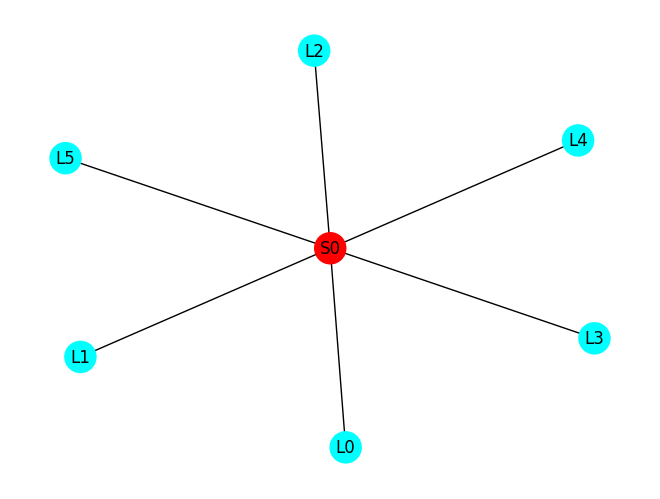

In [30]:
from neurd import neuron_visualizations as nviz
nviz.plot_soma_limb_concept_network(
    neuron_obj
)

In [31]:
multi_soma_split_parameters = dict()

In [32]:
_ = neuron_obj.calculate_multi_soma_split_suggestions(
    plot = True,
    store_in_obj = True,
    **multi_soma_split_parameters
)


In [33]:
neuron_obj.pipeline_products.multi_soma_split_suggestions.multi_soma_split_parameters = multi_soma_split_parameters

# Step 4B: Multi Soma Split Execution

In [34]:
neuron_list = neuron_obj.multi_soma_split_execution(
    verbose = False,
)

No error limbs to processs so just returning the original neuron


In [35]:
n1 = neuron_list[0]
print(n1.pipeline_products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691134917511946,
  },
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(15723, 3), faces.shape=(38825, 3))>, <trimesh.Trimesh(vertices.shape=(4348, 3), faces.shape=(8941, 3))>, <trimesh.Trimesh(vertices.shape=(1586, 3), faces.shape=(3510, 3))>, <trimesh.Trimesh(vertices.shape=(808, 3), faces.shape=(1812, 3))>, <trimesh.Trimesh(vertices.shape=(806, 3), faces.shape=(1809, 3))>, <trimesh.Trimesh(vertices.shape=(805, 3), faces.shape=(1808, 3))>, <trimesh.Trimesh(vertices.shape=(668, 3), faces.shape=(1502, 3))>, <trimesh.Trimesh(vertices.shape=(636, 3), faces.shape=(882, 3))>, <trimesh.Trimesh(vertices.shape=(534, 3), faces.shape=(1170, 3))>, <trimesh.Trimesh(vertices.shape=(2419, 3), faces.shape=(4893, 3))>, <trimesh.Trimesh(vertices.shape=(1665, 3), faces.shape=(2568, 3))>, <trimesh.Trimesh(vertices.shape=(1619, 3), faces

# Step 5: Cell Typing

In [36]:
from neurd import neuron_pipeline_utils as npu

In [44]:
neuron_obj_axon = npu.cell_type_ax_dendr_stage(
    n1,
    mesh_decimated = mesh_decimated,
    plot_axon = False,
)


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 4


Number of segments: 4


Number of segments: 3


Number of segments: 3


Number of segments: 4


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 1


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 1


Number of segments: 4


Number of segments: 4


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 4


Number of segments: 2


Number of segments: 2


Number of segme


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 3


Number of segments: 1


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 4


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segme


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 1


Number of segments: 3


Number of segments: 3


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segme


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 5


Number of segments: 6


Number of segments: 7


Number of segments: 1


Number of segments: 3


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 1


Number of segments: 1


Number of segments: 5


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 4


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segme


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 4


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segme

Number of segments: 1


Number of segments: 5


Number of segments: 4


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 4


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segmen


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 1


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segme


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 4


Number of segments: 1


Number of segments: 4


Number of segments: 3


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 4


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 4


Number of segments: 3


Number of segments: 1


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 4


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segme


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 4


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segme


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 4


Number of segments: 4


Number of segments: 2


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segme

Number of segments: 1


Number of segments: 4


Number of segments: 4


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 4


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 4


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segmen


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 4


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 1


Number of segments: 1


Number of segments: 3


Number of segments: 3


Number of segments: 1


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 5


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segme

invalidation_d = 1500
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 1150
filter_end_node_length_meshparty = 1150
invalidation_d = 1500
root_curr = [ 552945.2  757231.5 1044509. ]
Time for preparing soma vertices and root: 0.0002758502960205078
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00,  1.02it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 1.4520647525787354
branches_touching_root = [16]
combining close nodes
combine_threshold = 1300
length of Graph = 13106
After combining close endpoints max(kept_branches_idx) = 230, len(kept_branches_idx) = 190
empty_indices % = 0.0
 conflict_indices % = 0.05154251788018087
Decomposing first pass: 11.920819997787476
Only Using MeshParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 8.344650268554688e-06
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.6702880859375e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.01077127456665039
sbv[0].reshape(-1,3) = [[ 552945.2  757231.5 1044509. ]]
closest_sk_pt_coord BEFORE = [ 552495.72569604  757785.38871569 1044811.89960749]
curre

In [45]:
nviz.plot_axon(
    neuron_obj_axon
)


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# Autoproofreading Stage

About to do syn_density stats
syn_density_post = 0.850867031959654
syn_density_head = 0.4172563522960589
syn_density_neck = 0.02254245123633369
syn_density_shaft = 0.32973860043735165
sk_length_synapse_density = 2262398.1511734948
About to do spine_density stats
postsyn_limb_branch = {'L0': array([ 0,  1,  3,  4,  6,  9, 10, 11, 12, 13, 14, 15, 18, 19, 23, 24, 25,
       27]), 'L1': array([0, 1, 4, 7]), 'L2': array([ 6,  7, 14]), 'L4': array([0]), 'L5': array([0])}
sk_length = 2167665.1788621293
# of spines = 997
Density = 0.4599418811180767
spine_density = 0.4599418811180767 (multiplier = 1000)
sk_length spine density = 2167665.1788621293
Done stats
Not apply_hand_made_low_rules
For model: LogisticRegression(class_weight={'excitatory': 1, 'inhibitory': 1.5}) 
with features: ['syn_density_shaft', 'spine_density']
pred_class = excitatory, pred_class_label = excitatory
Total time for e/i calculations = 0.11161398887634277
baylor_e_i = excitatory

*****Using v7 Filters!!!


Current node s

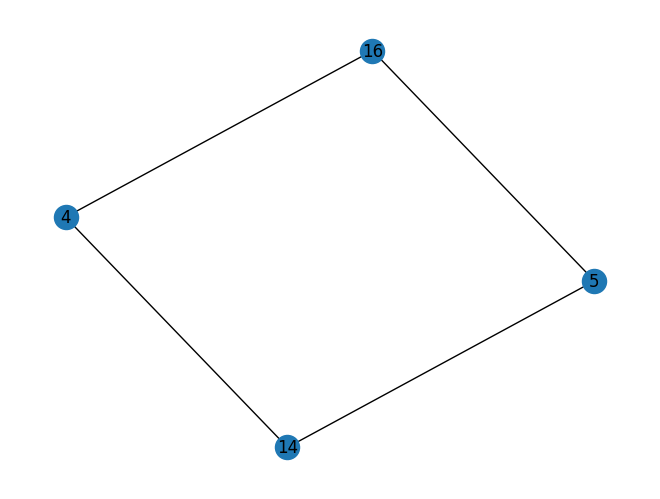

Performing global features query
Done with edge_df: 0.0009081363677978516
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   5  14     23.88   52.104997               0.341727              0.000335   
1   5  16     23.63   17.081837               0.112030              0.000335   
2  14   4     52.16    5.100714               0.048361              0.000000   
3  16   4     22.12   64.086120               0.607617              0.000000   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                1                       None                          None  
1                1                       None                          None  
2                0                       None                          None  
3                0                       None                          None  
Afer Globa

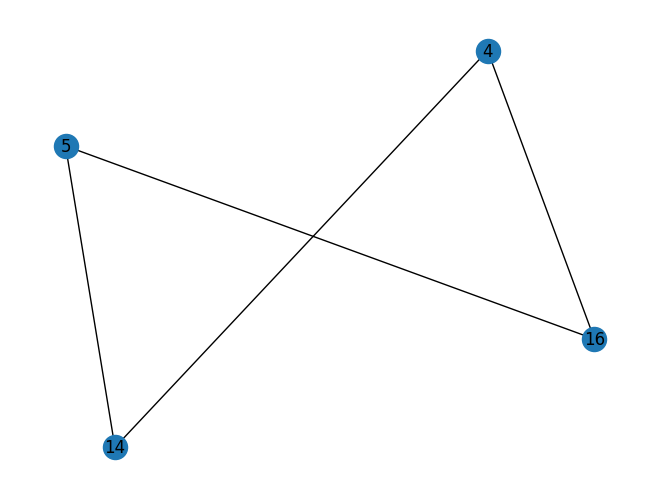

Performing node features query
Done with edge_df: 0.0008230209350585938
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   5  14     23.88   52.104997               0.341727              0.000335   
1   5  16     23.63   17.081837               0.112030              0.000335   
2  14   4     52.16    5.100714               0.048361              0.000000   
3  16   4     22.12   64.086120               0.607617              0.000000   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                1                       None                          None   
1                1                       None                          None   
2                0                       None                          None   
3                0                       None                          None   

  above_

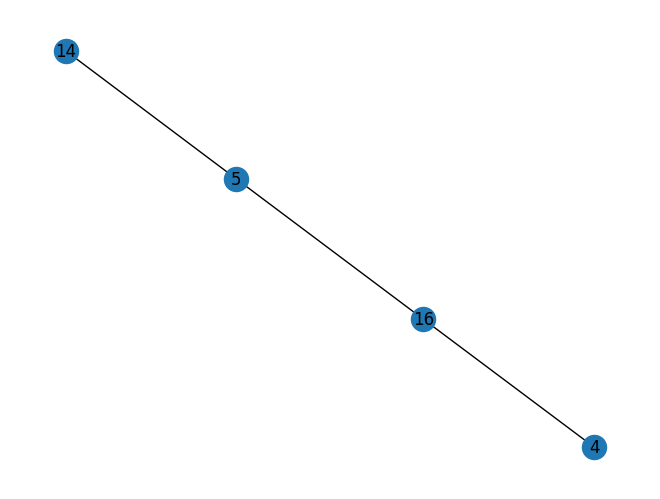

for upstream node 4, winning_node = None, error_branches = [ 5 14 16]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1801.9814429486014 but max skip distance was 2223.743068929187
Current node skip distance was 1513.8828772852676 but max skip distance was 1513.8828772852676
Current node skip distance was 2300 but max skip distance was 2300.0
Current node skip distance was 1556.3107065379645 but max skip distance was 1556.3107065379645
Current node skip distance was 1501.6117307514455 but max skip distance was 1501.6117307514455
Current node skip distance was 1744.1078977248021 but max skip distance was 1907.5960407800462
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0010175704956054688
Performing Edge Query
After edge filter, # of rows = 2
Exporting the edges
Deleteing edges only

-

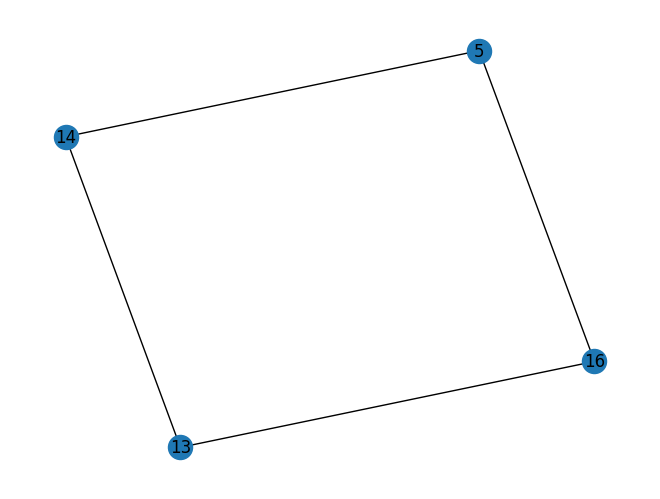

Performing global features query
Done with edge_df: 0.0008800029754638672
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   5  14     23.88   52.104997               0.341727              0.000335   
1   5  16     23.63   17.081837               0.112030              0.000335   
2  14  13     64.30   13.832181               0.121120              0.000000   
3  16  13     33.57   55.354653               0.484705              0.000000   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                1                       None                          None  
1                1                       None                          None  
2                0                       None                          None  
3                0                       None                          None  
Afer Globa

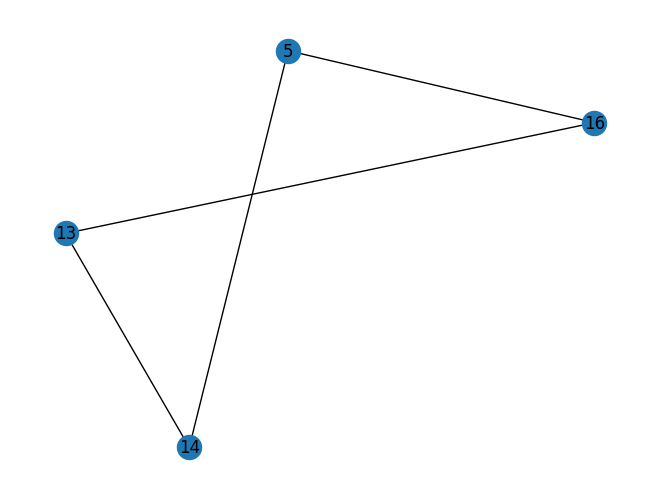

Performing node features query
Done with edge_df: 0.0007116794586181641
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   5  14     23.88   52.104997               0.341727              0.000335   
1   5  16     23.63   17.081837               0.112030              0.000335   
2  14  13     64.30   13.832181               0.121120              0.000000   
3  16  13     33.57   55.354653               0.484705              0.000000   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                1                       None                          None   
1                1                       None                          None   
2                0                       None                          None   
3                0                       None                          None   

  above_

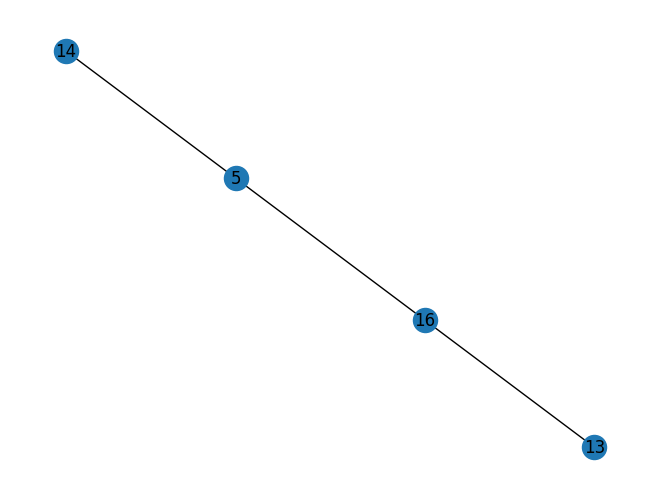

for upstream node 13, winning_node = None, error_branches = [ 5 14 16]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1584.8772872600919 but max skip distance was 1584.8772872600919
Current node skip distance was 1873.1557631602866 but max skip distance was 1873.1557631602866
Current node skip distance was 1700.0525193234866 but max skip distance was 2300.0
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0009932518005371094
Performing Edge Query
After edge filter, # of rows = 8
Exporting the edges
Deleteing edges only

--- Before Local Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   0   2     83.24   80.583125               1.102563              0.000201   
1   0   4     63.12   41.115666               0.562557              0.000000   
2  

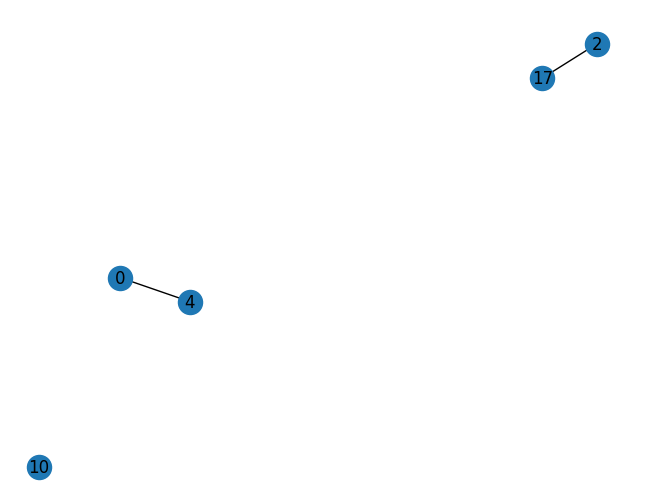

Performing global features query
Done with edge_df: 0.0007545948028564453
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
   u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  0   4     63.12   41.115666               0.562557              0.000000   
1  2  17      2.31   25.657585               0.200430              0.000201   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                0                       None                          None  
1                1                      False                          None  
Afer Global query: 
   u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  0   4     63.12   41.115666               0.562557              0.000000   
1  2  17      2.31   25.657585               0.200430              0.000201   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_de

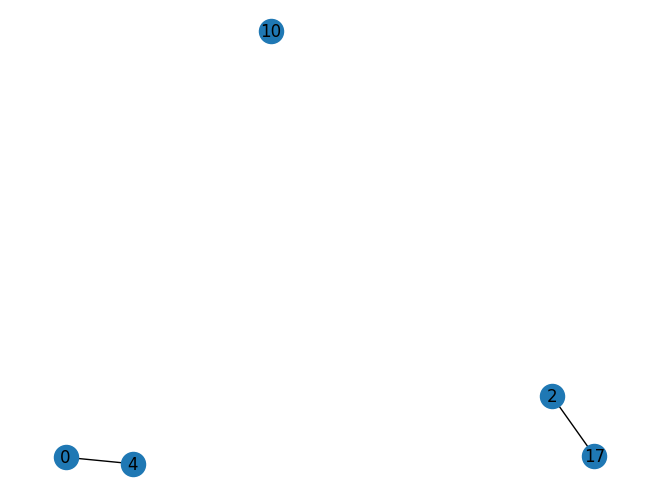

Performing node features query
Done with edge_df: 0.0005939006805419922
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
   u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  0   4     63.12   41.115666               0.562557              0.000000   
1  2  17      2.31   25.657585               0.200430              0.000201   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                0                       None                          None   
1                1                      False                          None   

  above_threshold_delete  
0                   None  
1                   None  
Afer Node query: 
   u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  0   4     63.12   41.115666               0.562557              0.000000   
1  2  17      2.31   25.657585               0.200430              0.000

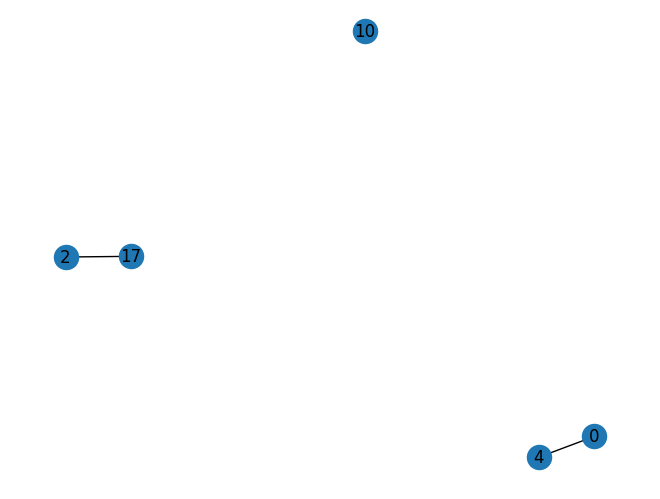

for upstream node 17, winning_node = 2, error_branches = [ 0  4 10]
Inside high_degree_false_positive_low_sibling_filter ****
Not exactly 2 downstream errors so returning
Current node skip distance was 1497.6150841524118 but max skip distance was 1497.6150841524118
Current node skip distance was 1780.438368687568 but max skip distance was 1780.438368687568
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0016756057739257812
Performing Edge Query
After edge filter, # of rows = 4
Exporting the edges
Deleteing edges only

--- Before Local Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  17  20     25.83   54.511479               0.425829              0.000000   
1  17  21     70.64    1.856650               0.014504              0.000189   
2  17  19     56.33   19.292604               0.130970              0.000000 

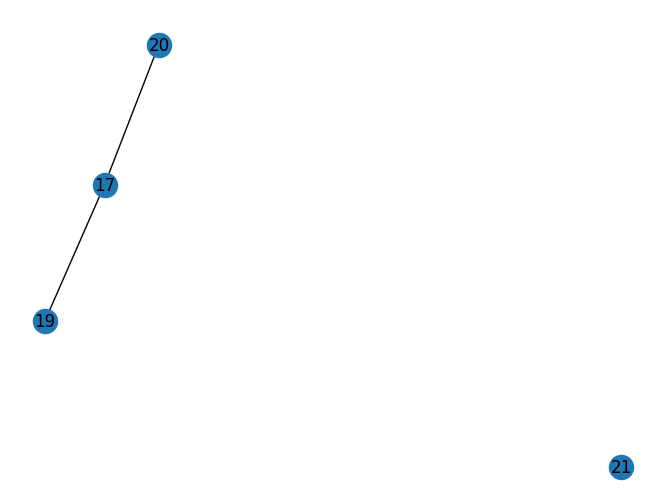

Performing global features query
Done with edge_df: 0.0008141994476318359
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  17  20     25.83   54.511479               0.425829                   0.0   
1  17  19     56.33   19.292604               0.130970                   0.0   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  
0                0                       False                          None  
1                0                        True                          None  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  17  20     25.83   54.511479               0.425829                   0.0   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  
0                0                       False                 

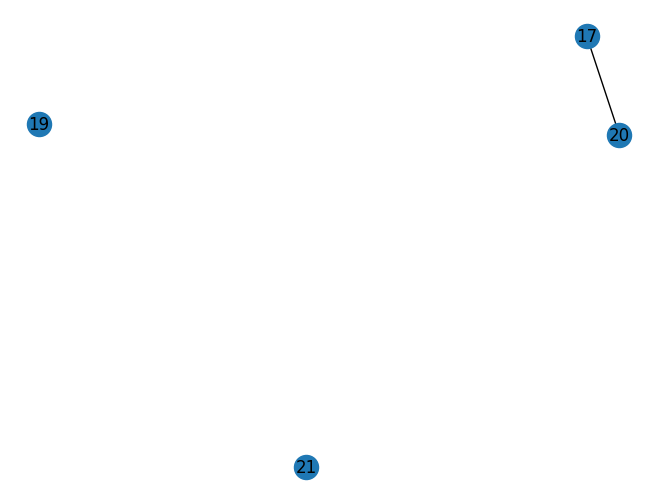

Performing node features query
Done with edge_df: 0.0007653236389160156
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  17  20     25.83   54.511479               0.425829                   0.0   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  \
0                0                       False                          None   

  above_threshold_delete  
0                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  17  20     25.83   54.511479               0.425829                   0.0   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  \
0                0                       False                          None   

  above_threshold_delete  
0                   None  


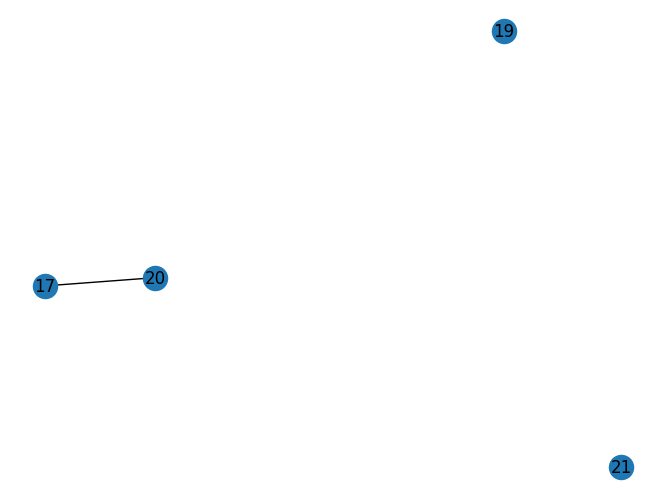

Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1472.9213556462194 but max skip distance was 1472.9213556462194
Current node skip distance was 1707.788560665129 but max skip distance was 1765.6264148850942
Current node skip distance was 1628.36603139084 but max skip distance was 1628.36603139084
Current node skip distance was 1480.048301990361 but max skip distance was 1480.048301990361
Current node skip distance was 1505.8889992953318 but max skip distance was 1505.8889992953318
Current node skip distance was 1697.8078080004534 but max skip distance was 1780.438368687568
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0019381046295166016
Performing Edge Query
After edge filter, # of rows = 9
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u   v  sk_angle  wid

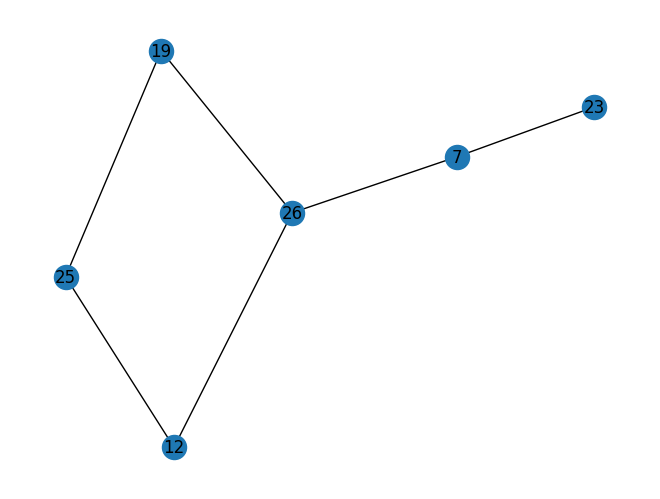

Performing global features query
Done with edge_df: 0.0008769035339355469
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   7  23     13.03    8.120298               0.097445              0.000084   
1   7  26     45.19   13.405755               0.160872              0.000197   
2  12  26     29.39   10.460680               0.130129              0.000281   
3  12  25     43.29   47.087059               0.369386              0.000278   
4  19  26     59.91   77.379073               0.525298              0.000281   
5  19  25     32.65   19.831335               0.155572              0.000278   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                1                      False                          None  
1                1                       True                          None  
2     

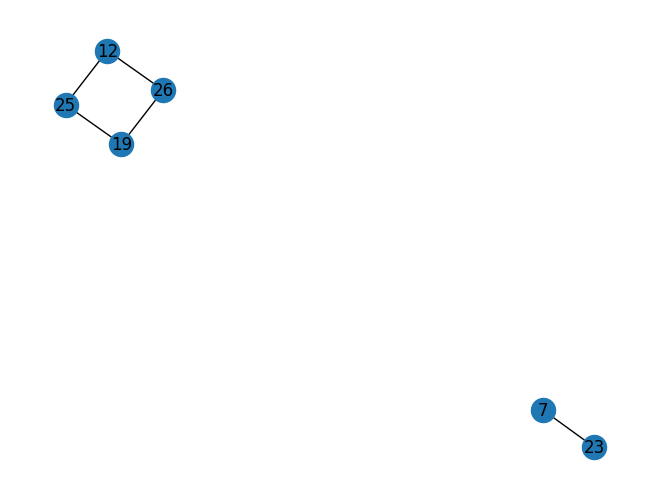

Performing node features query
Done with edge_df: 0.0009469985961914062
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   7  23     13.03    8.120298               0.097445              0.000084   
1  12  26     29.39   10.460680               0.130129              0.000281   
2  12  25     43.29   47.087059               0.369386              0.000278   
3  19  26     59.91   77.379073               0.525298              0.000281   
4  19  25     32.65   19.831335               0.155572              0.000278   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                1                      False                          None   
1                2                       None                          None   
2                1                       None                          None   
3       

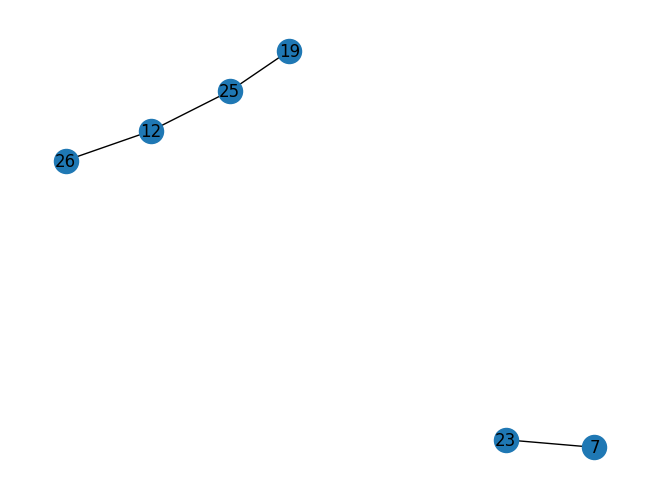

for upstream node 25, winning_node = None, error_branches = [ 7 12 19 23 26]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1458.0255655002047 but max skip distance was 1458.0255655002047
Current node skip distance was 1473.9583068018837 but max skip distance was 1473.9583068018837
Current node skip distance was 1439.2097328140164 but max skip distance was 1439.2097328140164
Current node skip distance was 1582.1102572469758 but max skip distance was 1697.8078080004534
Current node skip distance was 1483.8872757410506 but max skip distance was 1483.8872757410506
Current node skip distance was 1373.696244750608 but max skip distance was 1373.696244750608
Current node skip distance was 2051.8343766422095 but max skip distance was 2051.8343766422095
Current node skip distance was 1404.883808123764 but max skip distance was 1404.883808123764
Current node skip distance was 1459.2028288115498 but max skip distance was 14

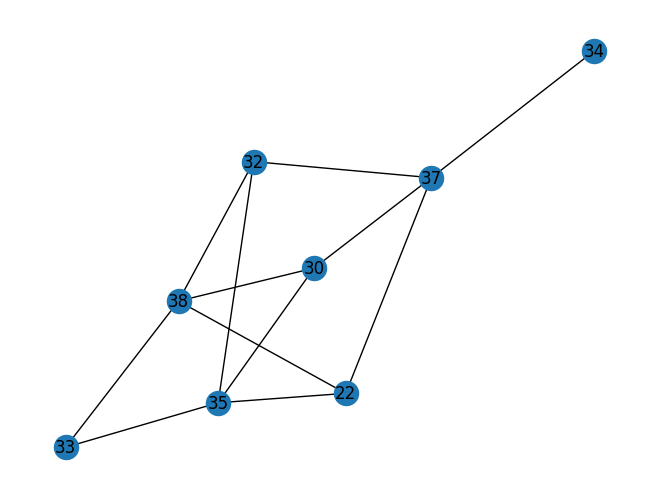

Performing global features query
Done with edge_df: 0.0008447170257568359
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   22  35     41.68   53.635734               0.484043              0.000000   
1   22  38     33.53   51.967919               0.468991              0.000000   
2   22  37     57.51   41.153587               0.270816              0.000197   
3   30  35     22.18   42.534348               0.426596              0.000000   
4   30  38     26.36   40.866533               0.409868              0.000000   
5   30  37     21.22   52.254973               0.343870              0.000197   
6   32  35     30.18   18.960832               0.249049              0.000000   
7   32  38     37.65   17.293017               0.227142              0.000000   
8   32  37     34.81   75.828489               0.498998              0.0

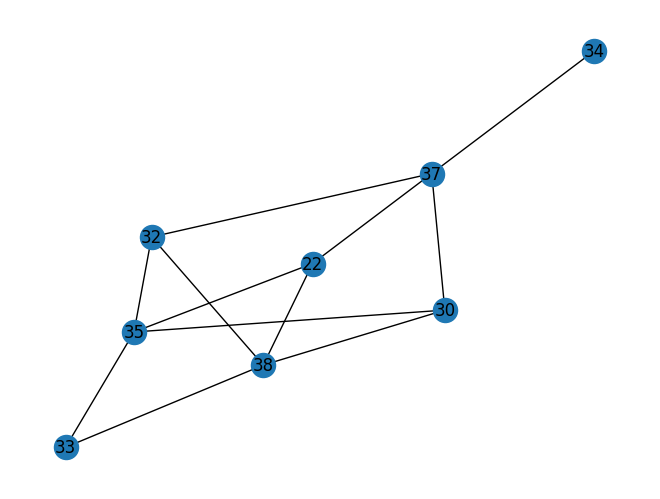

Performing node features query
Done with edge_df: 0.0009582042694091797
Performing Edge Query
After edge filter, # of rows = 2
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   22  35     41.68   53.635734               0.484043              0.000000   
1   22  38     33.53   51.967919               0.468991              0.000000   
2   22  37     57.51   41.153587               0.270816              0.000197   
3   30  35     22.18   42.534348               0.426596              0.000000   
4   30  38     26.36   40.866533               0.409868              0.000000   
5   30  37     21.22   52.254973               0.343870              0.000197   
6   32  35     30.18   18.960832               0.249049              0.000000   
7   32  38     37.65   17.293017               0.227142              0.000000   
8   32  37     34.81   75.828489               0.498998              0.00019

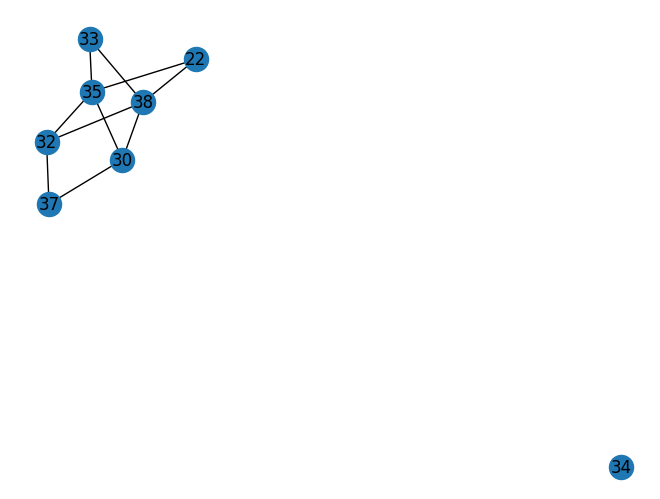

for upstream node 37, winning_node = None, error_branches = [22 30 32 33 34 35 38]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1411.8330370166711 but max skip distance was 1411.8330370166711
Current node skip distance was 1420.3496711923483 but max skip distance was 1420.3496711923483
Current node skip distance was 1542.3568897734592 but max skip distance was 1542.3568897734592
Current node skip distance was 1623.3807133015512 but max skip distance was 2300.0
Current node skip distance was 1763.4735386570042 but max skip distance was 1763.4735386570042
Current node skip distance was 1806.1698114568526 but max skip distance was 2194.6320494015
Current node skip distance was 1549.5094091401704 but max skip distance was 1549.5094091401704
Current node skip distance was 1405.8021735458456 but max skip distance was 1405.8021735458456
Current node skip distance was 1537.3962921509756 but max skip distance was 1763.47

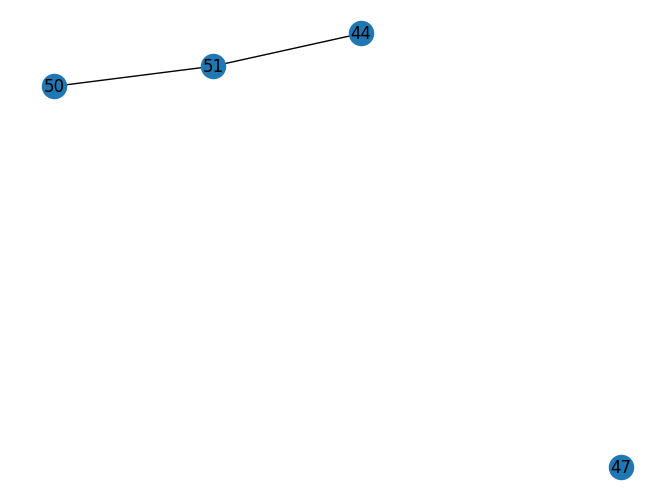

Performing global features query
Done with edge_df: 0.001003265380859375
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  44  51     43.30  141.860633               0.497592              0.000244   
1  50  51     38.68  112.871744               0.395910              0.000012   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                5                       None                          None  
1                2                       None                          None  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  44  51     43.30  141.860633               0.497592              0.000244   
1  50  51     38.68  112.871744               0.395910              0.000012   

   n_synapses_diff definite_partner_sk_delete definite_partner_wid

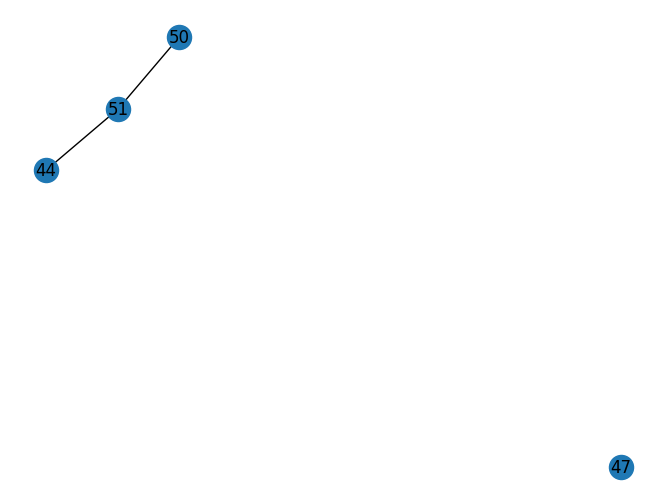

Performing node features query
Done with edge_df: 0.000997781753540039
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  44  51     43.30  141.860633               0.497592              0.000244   
1  50  51     38.68  112.871744               0.395910              0.000012   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                5                       None                          None   
1                2                       None                          None   

  above_threshold_delete  
0                   None  
1                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  44  51     43.30  141.860633               0.497592              0.000244   
1  50  51     38.68  112.871744               0.395910              

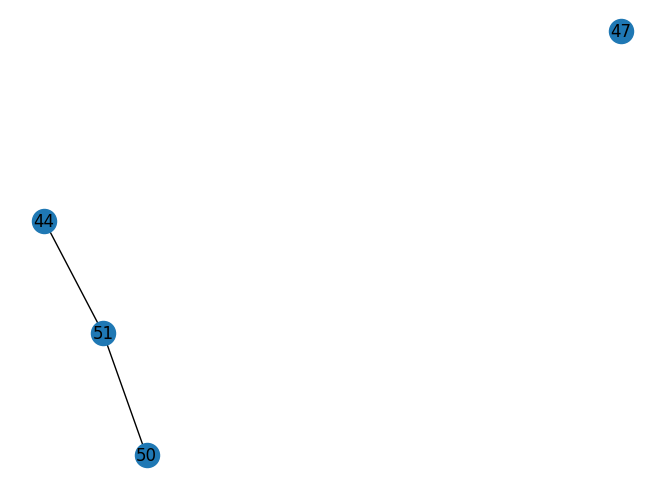

for upstream node 51, winning_node = None, error_branches = [44 47 50]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1435.7914660648214 but max skip distance was 1435.7914660648214
Current node skip distance was 1537.4462799508556 but max skip distance was 1537.4462799508556
Current node skip distance was 1815.5757405709428 but max skip distance was 2300.0
Current node skip distance was 1560.0432454088057 but max skip distance was 1769.2843244318244
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0010192394256591797
Performing Edge Query
After edge filter, # of rows = 4
Exporting the edges
Deleteing edges only

--- Before Local Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  54  61     11.24   27.490312               0.308925              

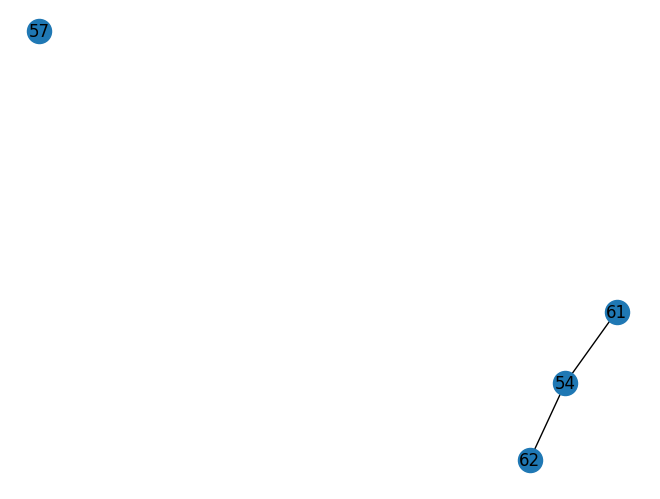

Performing global features query
Done with edge_df: 0.0006289482116699219
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  54  61     11.24   27.490312               0.308925                   0.0   
1  54  62     30.17   55.641131               0.625272                   0.0   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                0                       None                          None  
1                0                       None                          None  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  54  61     11.24   27.490312               0.308925                   0.0   
1  54  62     30.17   55.641131               0.625272                   0.0   

   n_synapses_diff definite_partner_sk_delete definite_partner_wi

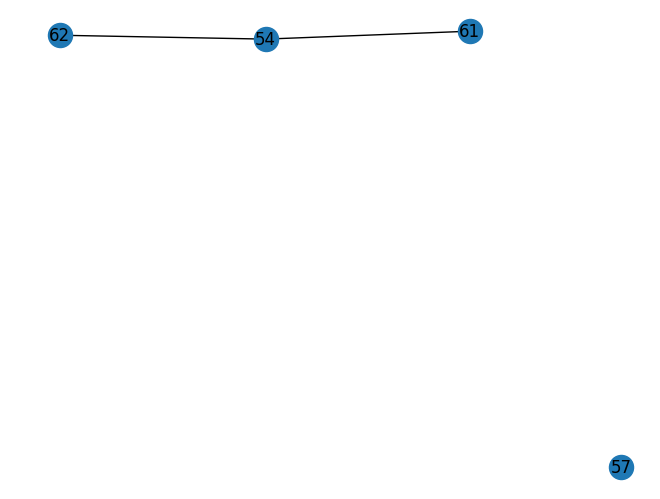

Performing node features query
Done with edge_df: 0.0006480216979980469
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  54  61     11.24   27.490312               0.308925                   0.0   
1  54  62     30.17   55.641131               0.625272                   0.0   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                0                       None                          None   
1                0                       None                          None   

  above_threshold_delete  
0                   None  
1                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  54  61     11.24   27.490312               0.308925                   0.0   
1  54  62     30.17   55.641131               0.625272             

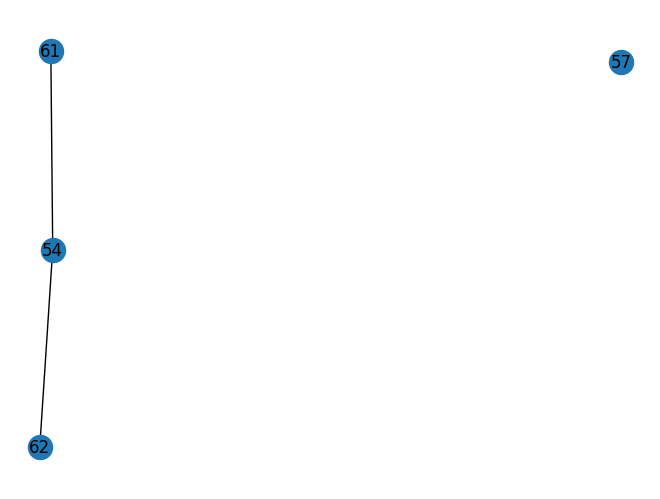

Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1580.032348021622 but max skip distance was 1806.1698114568526
Current node skip distance was 1957.1173195515312 but max skip distance was 1957.1173195515312
Current node skip distance was 1651.9892486972194 but max skip distance was 1651.9892486972194
Current node skip distance was 1769.2843244318244 but max skip distance was 1769.2843244318244
Current node skip distance was 2203.083803529463 but max skip distance was 2300.0
Current node skip distance was 2061.1312504525927 but max skip distance was 2203.083803529463
Current node skip distance was 1606.498192758714 but max skip distance was 1606.498192758714
Current node skip distance was 1731.6259594611638 but max skip distance was 2061.1312504525927
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with

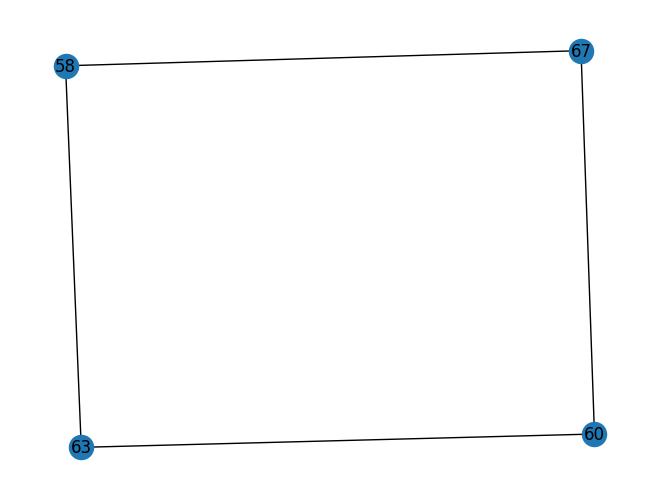

Performing global features query
Done with edge_df: 0.0008418560028076172
Performing Edge Query
After edge filter, # of rows = 2
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  58  63     17.13   73.054128               0.736375              0.000199   
1  58  67     16.34   36.382467               0.268327              0.000000   
2  60  63     43.14   17.446265               0.091964              0.000199   
3  60  67     28.74   54.117926               0.399129              0.000000   

   n_synapses_diff definite_partner_width_delete definite_partner_sk_delete  
0                3                          True                       None  
1                0                          None                       None  
2                3                         False                       None  
3                0                          True                       None  
Afer Globa

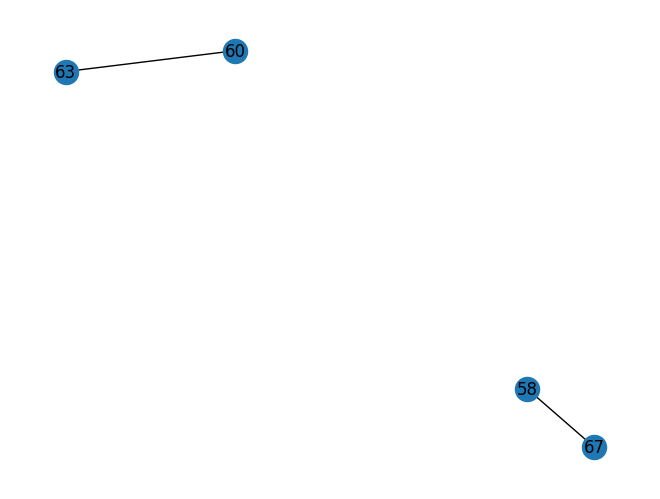

Performing node features query
Done with edge_df: 0.0007860660552978516
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  58  67     16.34   36.382467               0.268327              0.000000   
1  60  63     43.14   17.446265               0.091964              0.000199   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                0                       None                          None   
1                3                       None                         False   

  above_threshold_delete  
0                   None  
1                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  58  67     16.34   36.382467               0.268327              0.000000   
1  60  63     43.14   17.446265               0.091964             

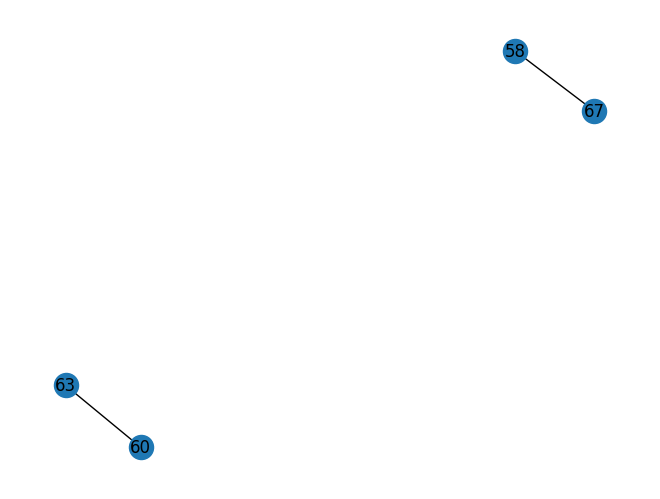

for upstream node 67, winning_node = 58, error_branches = [60 63]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (99.20776352518945) less than width_min(250)
Current node skip distance was 1953.9356343413888 but max skip distance was 1953.9356343413888
Current node skip distance was 1656.7132565072902 but max skip distance was 1953.9356343413888
Current node skip distance was 2300 but max skip distance was 2300.0
Current node skip distance was 1450.8454232028087 but max skip distance was 1450.8454232028087
Current node skip distance was 1527.1977673222736 but max skip distance was 1527.1977673222736
Current node skip distance was 1777.2547339923053 but max skip distance was 1777.2547339923053
Current node skip distance was 1495.1826541044018 but max skip distance was 1733.8433656023644
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df:

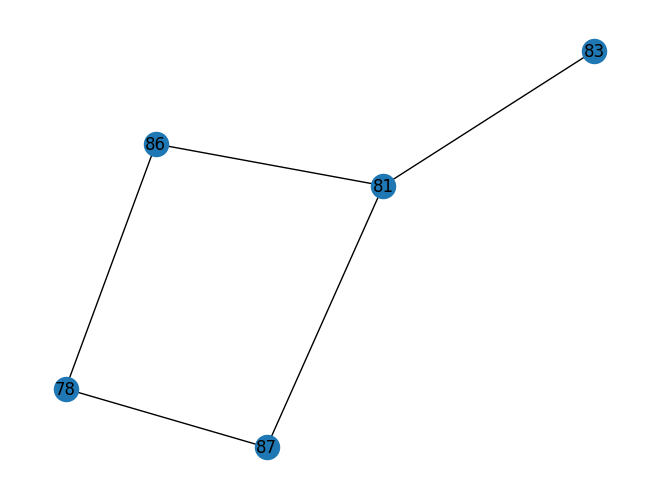

Performing global features query
Done with edge_df: 0.0006854534149169922
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  81  83     16.49   52.312036               0.624171                   0.0   
1  81  86     23.95    3.354177               0.040021                   0.0   
2  81  87     49.84   11.469208               0.136847                   0.0   
3  86  78     51.57    8.320712               0.105534                   0.0   
4  87  78     33.58    6.502674               0.082475                   0.0   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                0                       None                          None  
1                0                       None                          None  
2                0                       None                          None  
3       

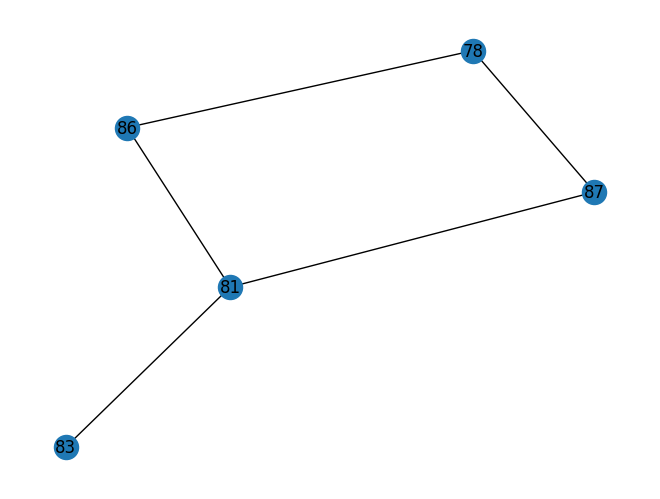

Performing node features query
Done with edge_df: 0.0009298324584960938
Performing Edge Query
After edge filter, # of rows = 2
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  81  83     16.49   52.312036               0.624171                   0.0   
1  81  86     23.95    3.354177               0.040021                   0.0   
2  81  87     49.84   11.469208               0.136847                   0.0   
3  86  78     51.57    8.320712               0.105534                   0.0   
4  87  78     33.58    6.502674               0.082475                   0.0   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                0                       None                          None   
1                0                       None                          None   
2                0                       None                          None   
3       

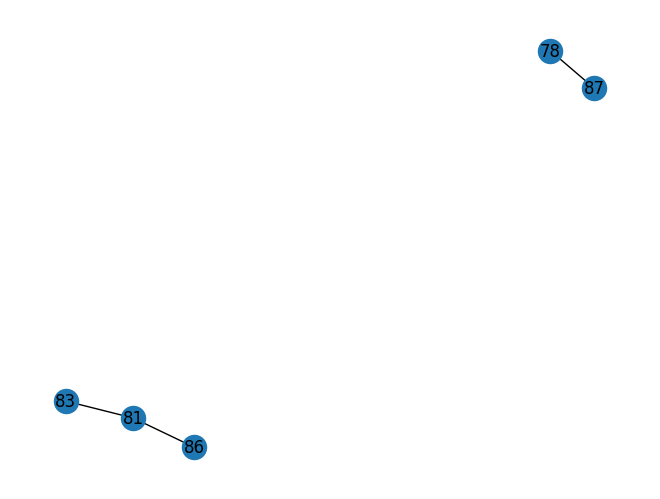

for upstream node 78, winning_node = 87, error_branches = [81 83 86]
Inside high_degree_false_positive_low_sibling_filter ****
Not exactly 2 downstream errors so returning
Current node skip distance was 1802.740382042523 but max skip distance was 1815.5757405709428
Current node skip distance was 1496.9905664249613 but max skip distance was 1496.9905664249613
Current node skip distance was 1515.8765468973097 but max skip distance was 1515.8765468973097
Current node skip distance was 2117.4775222082144 but max skip distance was 2117.4775222082144
Current node skip distance was 1733.8433656023644 but max skip distance was 1733.8433656023644
Current node skip distance was 1339.7220065951572 but max skip distance was 2117.4775222082144
Current node skip distance was 1529.8522860692512 but max skip distance was 1529.8522860692512
Current node skip distance was 1468.0881790702963 but max skip distance was 1692.1941438185913
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage 

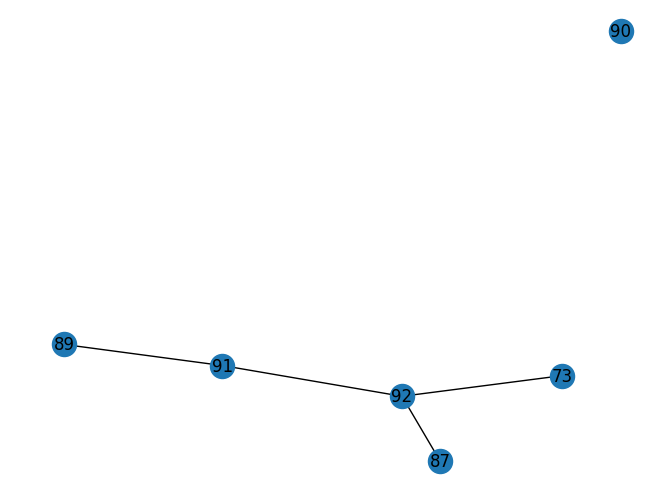

Performing global features query
Done with edge_df: 0.000675201416015625
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  73  92     10.84    5.038227               0.073871              0.000174   
1  89  91     64.64   34.555689               0.273976              0.000000   
2  91  92     49.21   18.329776               0.200170              0.000000   
3  92  87     12.25    0.899966               0.012441              0.000000   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                2                       None                          None  
1                0                       None                          None  
2                0                       None                          None  
3                0                       None                          None  
Afer Global

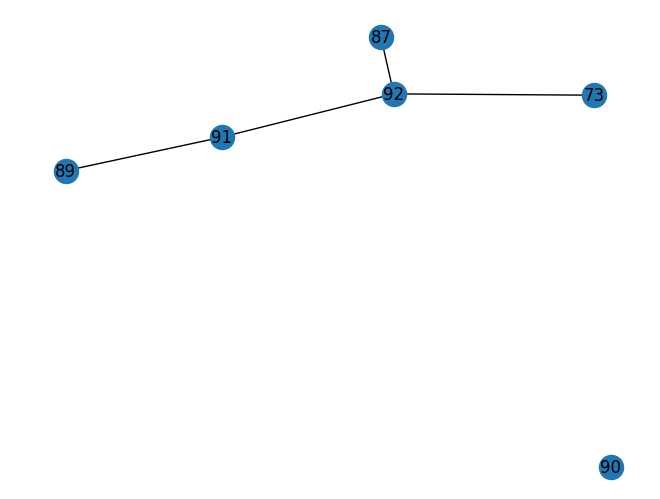

Performing node features query
Done with edge_df: 0.0006954669952392578
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  73  92     10.84    5.038227               0.073871              0.000174   
1  89  91     64.64   34.555689               0.273976              0.000000   
2  91  92     49.21   18.329776               0.200170              0.000000   
3  92  87     12.25    0.899966               0.012441              0.000000   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                2                       None                          None   
1                0                       None                          None   
2                0                       None                          None   
3                0                       None                          None   

  above_

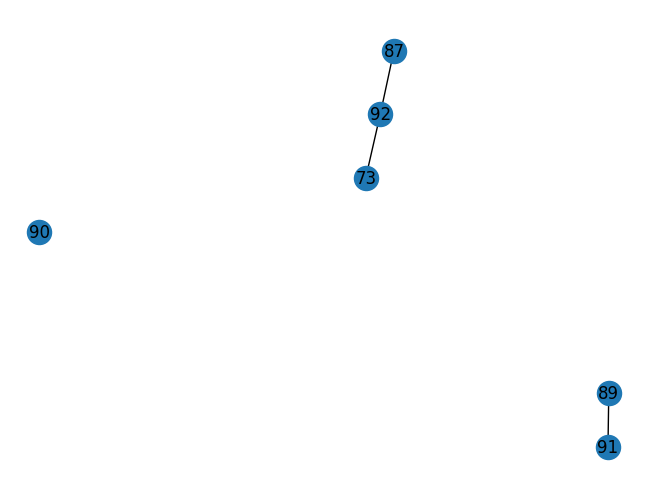

for upstream node 87, winning_node = None, error_branches = [73 89 90 91 92]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1558.6216205458122 but max skip distance was 1777.2547339923053
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0017008781433105469
Performing Edge Query
After edge filter, # of rows = 4
Exporting the edges
Deleteing edges only

--- Before Local Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  69  77    112.54   28.929955               0.245980              0.000000   
1  69  82     40.65   74.770572               0.635744              0.000248   
2  69  88     77.03   23.541993               0.250263              0.000112   
3  77  82    101.75   45.840618               0.312817              0.000248   
4  77  88     5

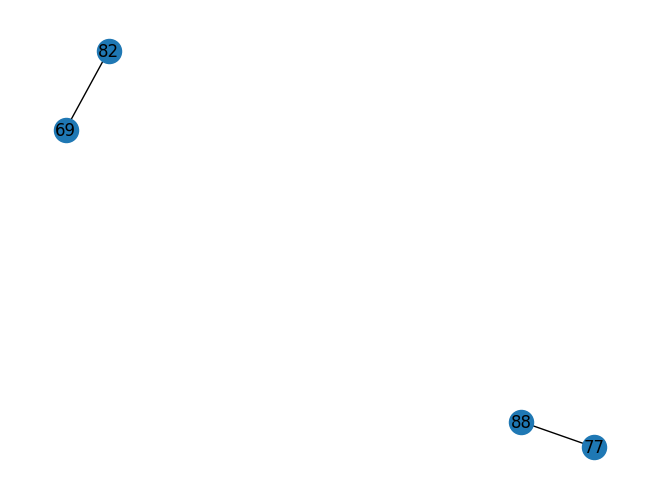

Performing global features query
Done with edge_df: 0.0014858245849609375
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  69  82     40.65   74.770572               0.635744              0.000248   
1  77  88     58.28   52.471947               0.557802              0.000112   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                1                      False                          None  
1                7                       None                          None  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  69  82     40.65   74.770572               0.635744              0.000248   
1  77  88     58.28   52.471947               0.557802              0.000112   

   n_synapses_diff definite_partner_sk_delete definite_partner_wi

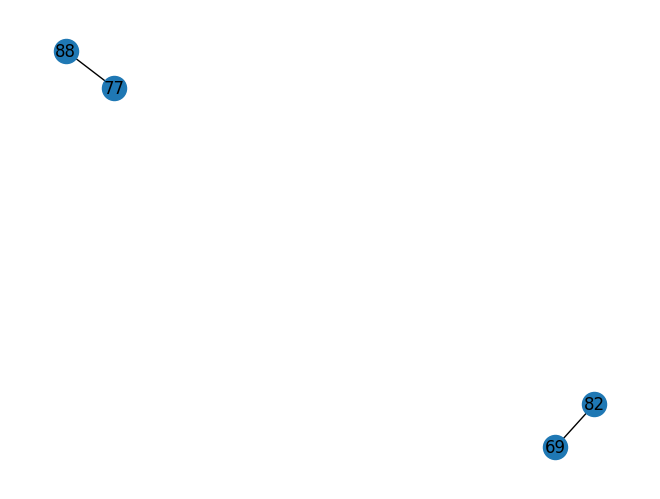

Performing node features query
Done with edge_df: 0.0006220340728759766
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  69  82     40.65   74.770572               0.635744              0.000248   
1  77  88     58.28   52.471947               0.557802              0.000112   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                1                      False                          None   
1                7                       None                          None   

  above_threshold_delete  
0                   None  
1                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  69  82     40.65   74.770572               0.635744              0.000248   
1  77  88     58.28   52.471947               0.557802             

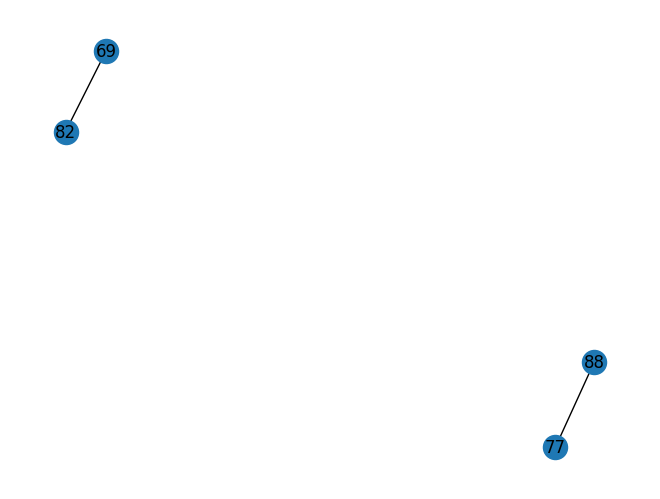

for upstream node 88, winning_node = 77, error_branches = [69 82]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (146.54113615815348) less than width_min(250)
Current node skip distance was 1692.1941438185913 but max skip distance was 1692.1941438185913
Current node skip distance was 1595.2433058087718 but max skip distance was 1595.2433058087718
Current node skip distance was 1548.2121046078248 but max skip distance was 1548.2121046078248
Current node skip distance was 1471.8380360714896 but max skip distance was 1471.8380360714896
Current node skip distance was 1529.1076968233356 but max skip distance was 1709.2369769763418
Current node skip distance was 2270.652649162401 but max skip distance was 2270.652649162401
Current node skip distance was 1505.828917486155 but max skip distance was 2270.652649162401
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff <

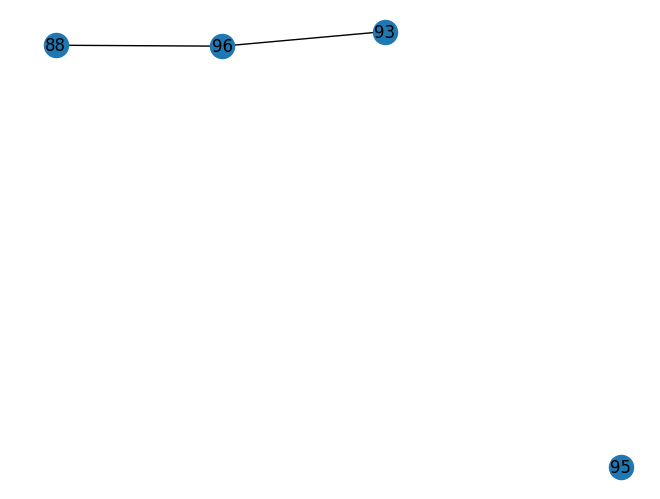

Performing global features query
Done with edge_df: 0.0008471012115478516
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  88  96     14.33   12.670249               0.155656              0.000091   
1  93  96     50.91    5.586907               0.068636              0.000020   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  
0                6                       False                          None  
1                1                        True                          None  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  88  96     14.33   12.670249               0.155656              0.000091   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  
0                6                       False                 

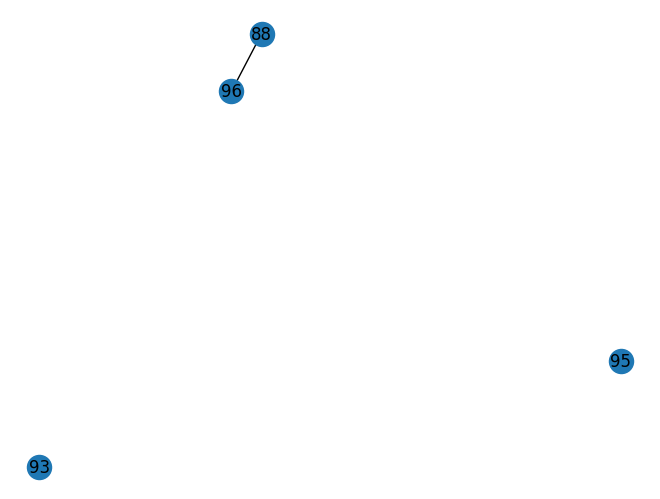

Performing node features query
Done with edge_df: 0.0006549358367919922
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  88  96     14.33   12.670249               0.155656              0.000091   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  \
0                6                       False                          None   

  above_threshold_delete  
0                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  88  96     14.33   12.670249               0.155656              0.000091   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  \
0                6                       False                          None   

  above_threshold_delete  
0                   None  


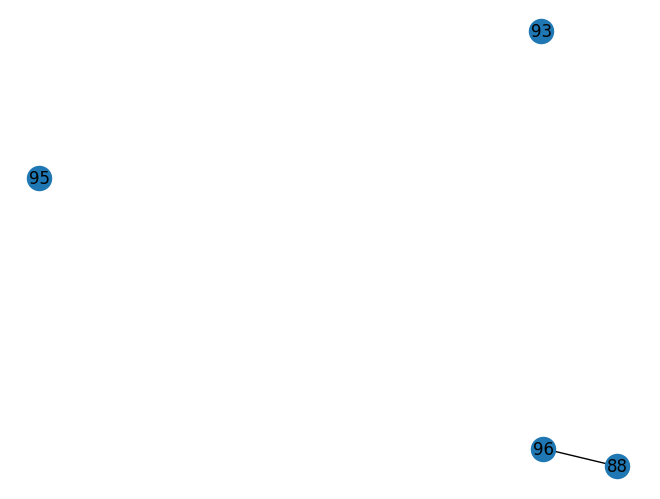

for upstream node 96, winning_node = 88, error_branches = [93 95]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (97.55504075401218) less than width_min(250)
Current node skip distance was 1667.080406546153 but max skip distance was 1987.0475794936974
Current node skip distance was 1529.5449883497408 but max skip distance was 1529.5449883497408
Current node skip distance was 1714.031247526074 but max skip distance was 1714.031247526074
Current node skip distance was 1987.0475794936974 but max skip distance was 1987.0475794936974
Current node skip distance was 1587.8480419026057 but max skip distance was 1793.1204510958955
Current node skip distance was 1474.7194784132298 but max skip distance was 1507.6908627035161
Current node skip distance was 1517.7243823465901 but max skip distance was 1517.7243823465901
Current node skip distance was 2300 but max skip distance was 2300.0
Current node skip distance was 1589.6765214571894 but max skip distance was 1589.6765

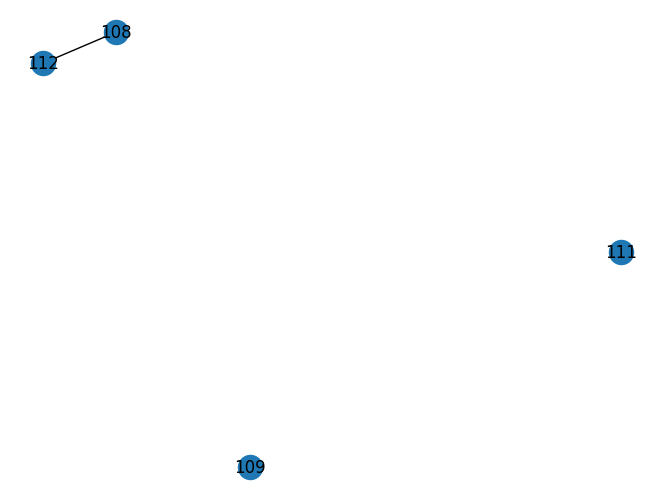

Performing global features query
Done with edge_df: 0.0005919933319091797
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  112  108     41.37   42.203666               0.413685   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000124                1                       False   

  definite_partner_width_delete  
0                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  112  108     41.37   42.203666               0.413685   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000124                1                       False   

  definite_partner_width_delete  
0                          None  


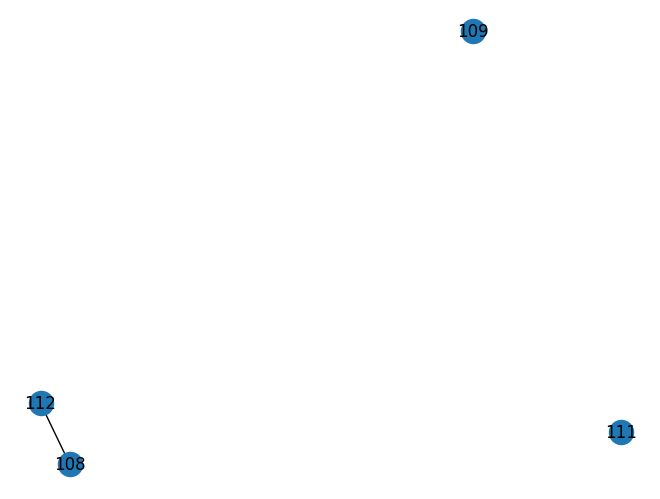

Performing node features query
Done with edge_df: 0.0005822181701660156
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  112  108     41.37   42.203666               0.413685   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000124                1                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  112  108     41.37   42.203666               0.413685   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000124                1                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  


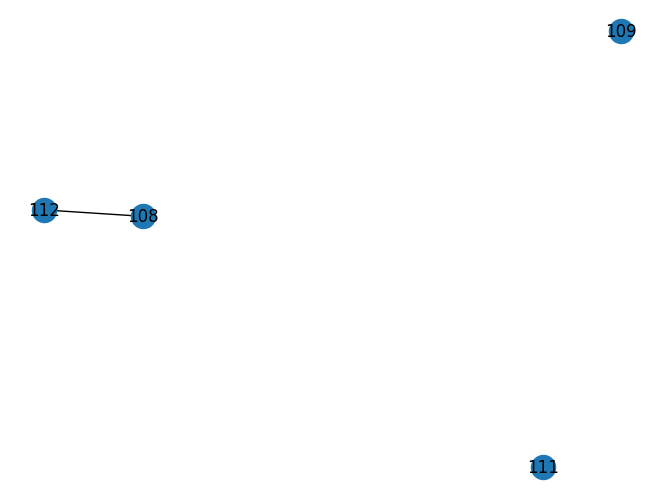

for upstream node 108, winning_node = 112, error_branches = [109 111]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (59.81510376025246) less than width_min(250)
Current node skip distance was 1558.5661985162365 but max skip distance was 1558.5661985162365
Current node skip distance was 1781.239046371689 but max skip distance was 1781.239046371689
Current node skip distance was 1463.7042418842564 but max skip distance was 1463.7042418842564
Current node skip distance was 1415.8962656677181 but max skip distance was 1415.8962656677181
Current node skip distance was 1519.0395242468926 but max skip distance was 1519.0395242468926
Current node skip distance was 1705.4473063307512 but max skip distance was 1705.4473063307512
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0012729167938232422
Performing Edge Query
After edge filter, # o

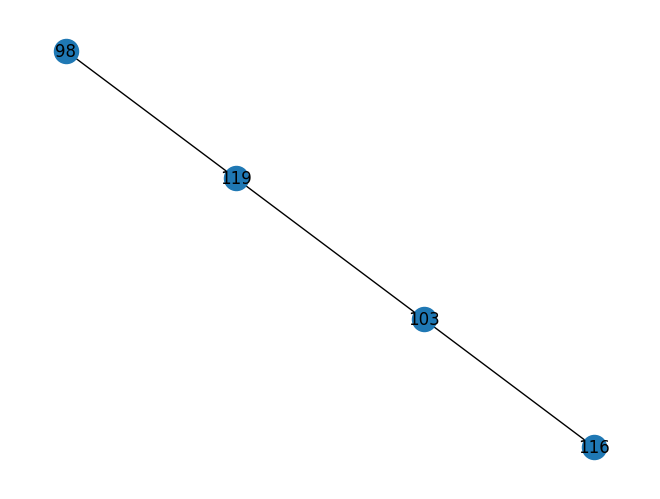

Performing global features query
Done with edge_df: 0.0005838871002197266
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0   98  119     51.47   10.531367               0.120924   
1  103  119     40.55   24.524100               0.242612   
2  103  116     41.01   28.223823               0.218269   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000075                1                       None   
1              0.000109                2                       None   
2              0.000000                0                       None   

  definite_partner_width_delete  
0                          None  
1                          None  
2                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0   98  119     51.47   10.531367               0.120924   

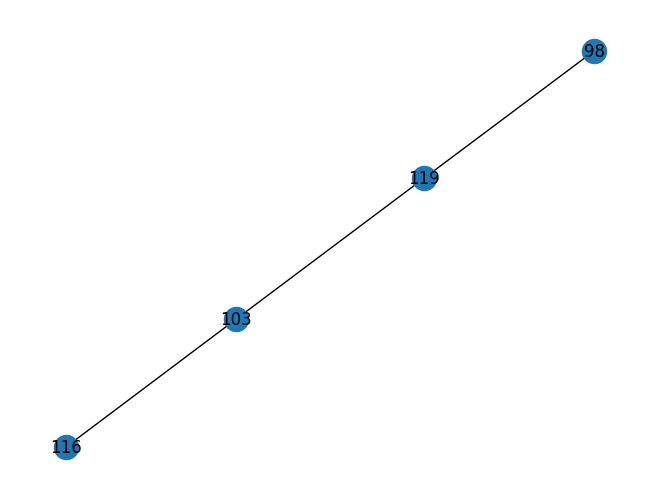

Performing node features query
Done with edge_df: 0.0006165504455566406
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0   98  119     51.47   10.531367               0.120924   
1  103  119     40.55   24.524100               0.242612   
2  103  116     41.01   28.223823               0.218269   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000075                1                       None   
1              0.000109                2                       None   
2              0.000000                0                       None   

  definite_partner_width_delete above_threshold_delete  
0                          None                   True  
1                          None                   None  
2                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff

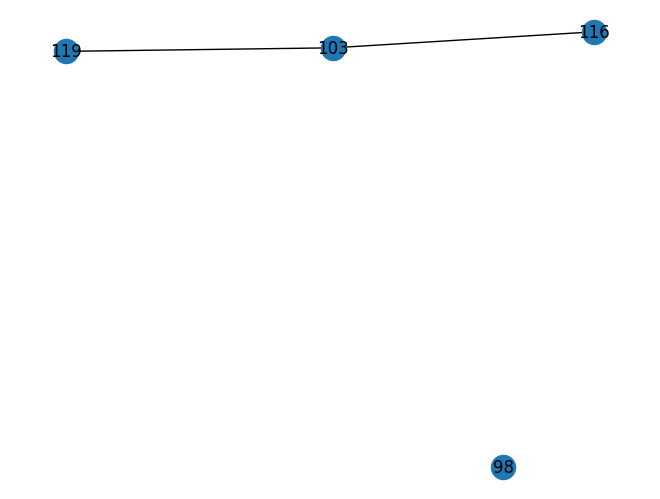

for upstream node 116, winning_node = None, error_branches = [ 98 103 119]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1671.1109103847189 but max skip distance was 2189.008702711271
Current node skip distance was 1679.6724162767975 but max skip distance was 2152.4296904558064
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0008487701416015625
Performing Edge Query
After edge filter, # of rows = 5
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  108  120     94.45   45.655389               0.447519   
1  108  122     75.40   39.451274               0.386706   
2  108  118     56.28   21.102610               0.171397   
3  120  122    159.93    6.204114               0.110073   
4  120  118    140.15  

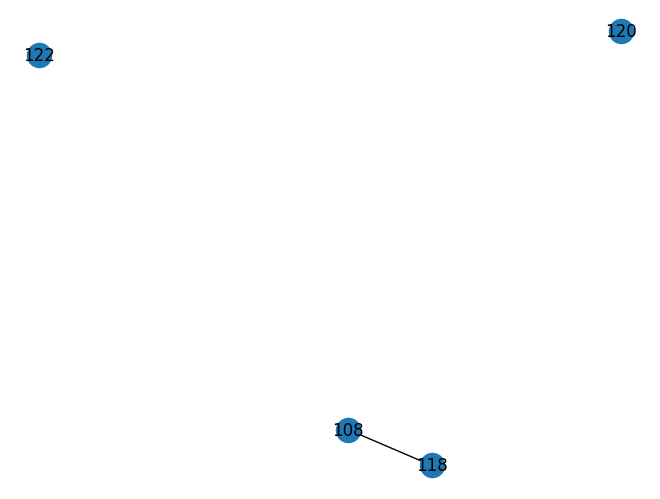

Performing global features query
Done with edge_df: 0.0006895065307617188
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  108  118     56.28    21.10261               0.171397   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000124                1                       None   

  definite_partner_width_delete  
0                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  108  118     56.28    21.10261               0.171397   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000124                1                       None   

  definite_partner_width_delete  
0                          None  


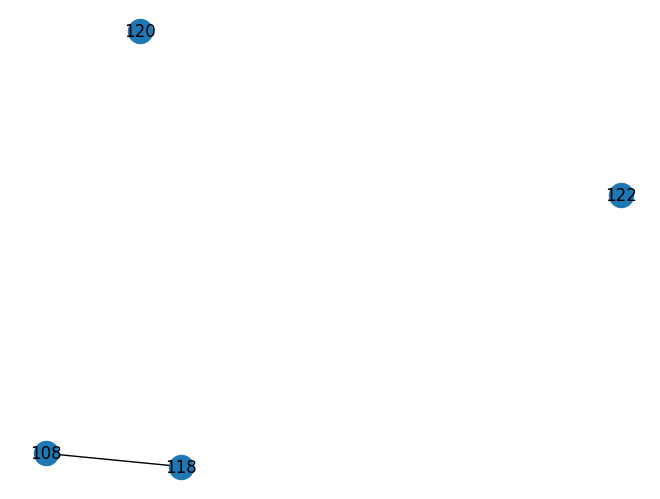

Performing node features query
Done with edge_df: 0.0008366107940673828
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  108  118     56.28    21.10261               0.171397   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000124                1                       None   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  108  118     56.28    21.10261               0.171397   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000124                1                       None   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  


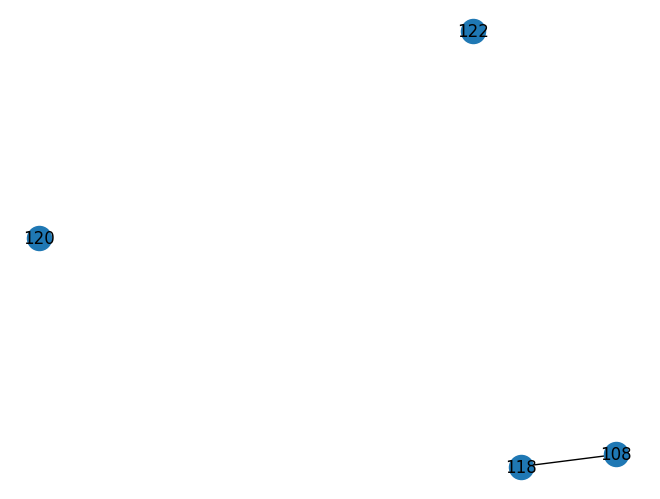

for upstream node 118, winning_node = 108, error_branches = [120 122]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (107.94957600549711) less than width_min(250)
Current node skip distance was 1485.6642933551425 but max skip distance was 1558.868122651933
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0008227825164794922
Performing Edge Query
After edge filter, # of rows = 4
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  149  151     30.73   19.842334               0.210801   
1  149  152     73.40   17.199650               0.182726   
2  149  119     96.83   17.568919               0.229481   
3  151  152    115.64    2.642684               0.035574   
4  151  119     68.71    2.273415               0.029695   
5  152  119     12.83    0.369269

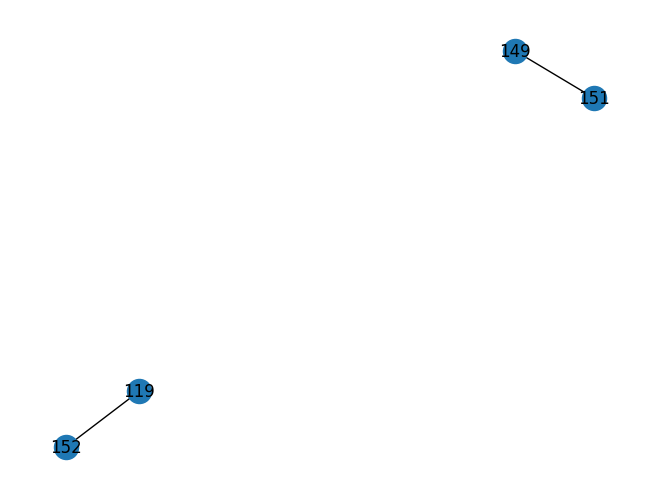

Performing global features query
Done with edge_df: 0.0005939006805419922
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  149  151     30.73   19.842334               0.210801   
1  152  119     12.83    0.369269               0.004823   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000000                0                       False   
1              0.000016                2                       False   

  definite_partner_width_delete  
0                          None  
1                         False  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  149  151     30.73   19.842334               0.210801   
1  152  119     12.83    0.369269               0.004823   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000000     

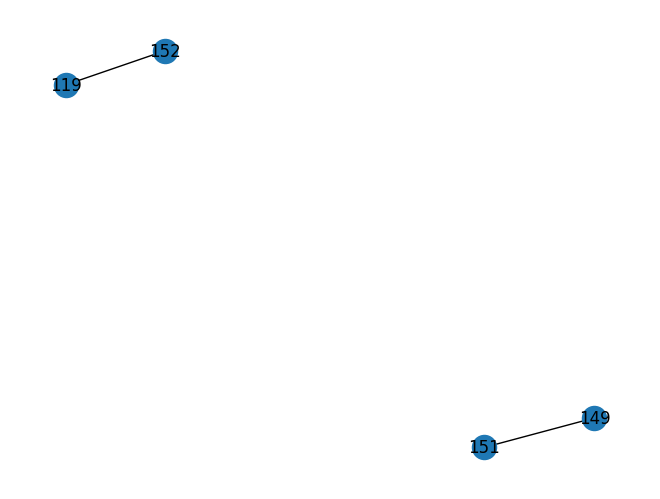

Performing node features query
Done with edge_df: 0.0008428096771240234
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  149  151     30.73   19.842334               0.210801   
1  152  119     12.83    0.369269               0.004823   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000000                0                       False   
1              0.000016                2                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                         False                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  149  151     30.73   19.842334               0.210801   
1  152  119     12.83    0.369269               0.004823   

   synapse_density_diff  n_synapses_d

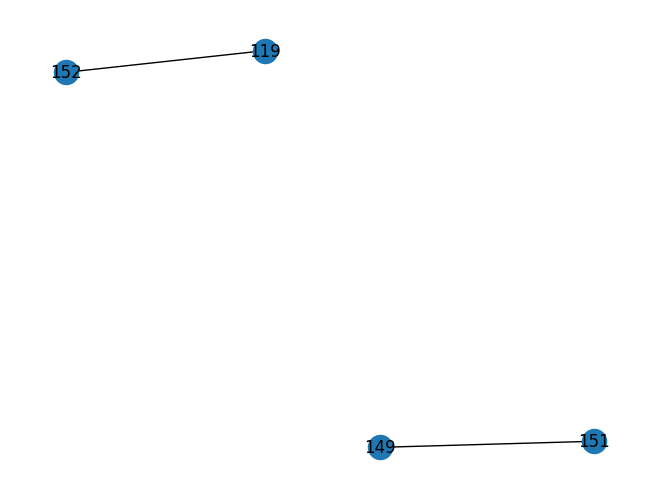

for upstream node 119, winning_node = 152, error_branches = [149 151]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (86.65776251469174) less than width_min(250)
Current node skip distance was 1401.514089053542 but max skip distance was 1671.1109103847189
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0008254051208496094
Performing Edge Query
After edge filter, # of rows = 3
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  117  134     50.97   19.255512               0.202318   
1  117  135     26.31   20.248635               0.212753   
2  117  120    129.50   38.810896               0.688584   
3  134  135    107.21    0.993123               0.013081   
4  134  120     66.14   19.555384               0.346952   
5  135  120     38.50   18.562261 

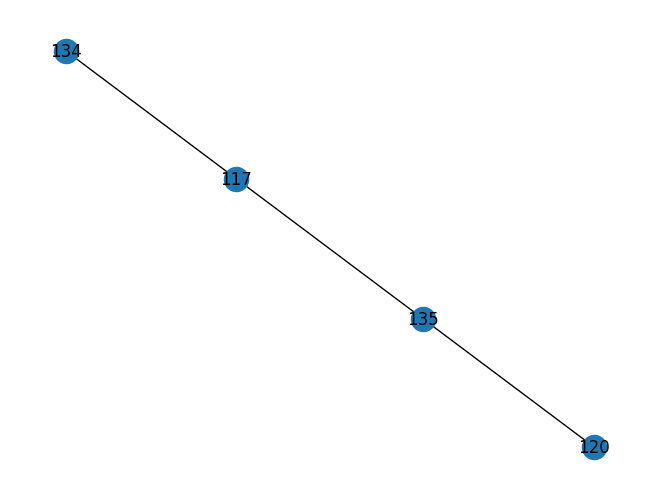

Performing global features query
Done with edge_df: 0.0006210803985595703
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  117  134     50.97   19.255512               0.202318   
1  117  135     26.31   20.248635               0.212753   
2  135  120     38.50   18.562261               0.329332   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000119                1                       None   
1              0.000032                0                       None   
2              0.000086                1                       None   

  definite_partner_width_delete  
0                          None  
1                          None  
2                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  117  134     50.97   19.255512               0.202318   

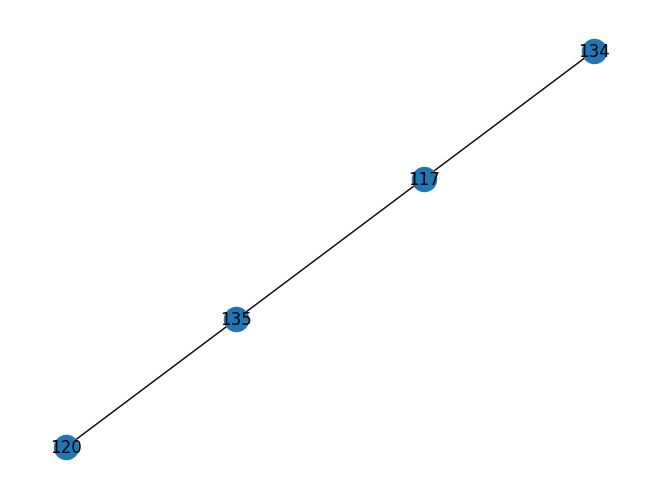

Performing node features query
Done with edge_df: 0.0006067752838134766
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  117  134     50.97   19.255512               0.202318   
1  117  135     26.31   20.248635               0.212753   
2  135  120     38.50   18.562261               0.329332   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000119                1                       None   
1              0.000032                0                       None   
2              0.000086                1                       None   

  definite_partner_width_delete above_threshold_delete  
0                          None                   True  
1                          None                   None  
2                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff

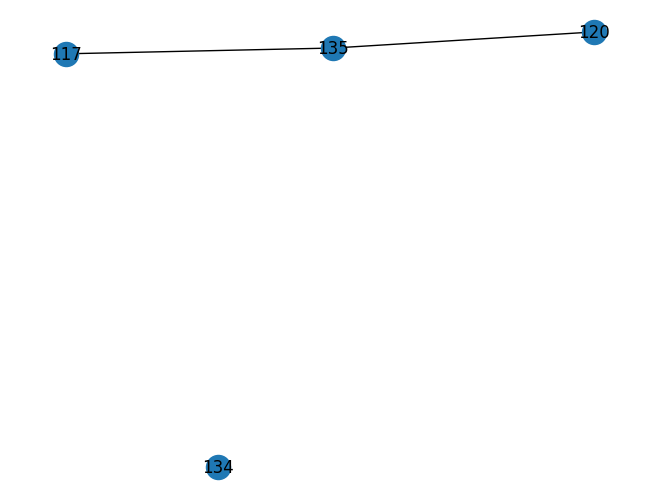

for upstream node 120, winning_node = None, error_branches = [117 134 135]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 2220.201260195426 but max skip distance was 2220.201260195426
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0010797977447509766
Performing Edge Query
After edge filter, # of rows = 4
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  110  123     76.31    9.594767               0.065050   
1  110  124     29.09   86.029616               0.583262   
2  110  121     82.29  145.660151               0.496866   
3  123  124     83.10   76.434849               0.554267   
4  123  121     26.58  155.254918               0.529596   
5  124  121    122.22  231.689767               0.790325   

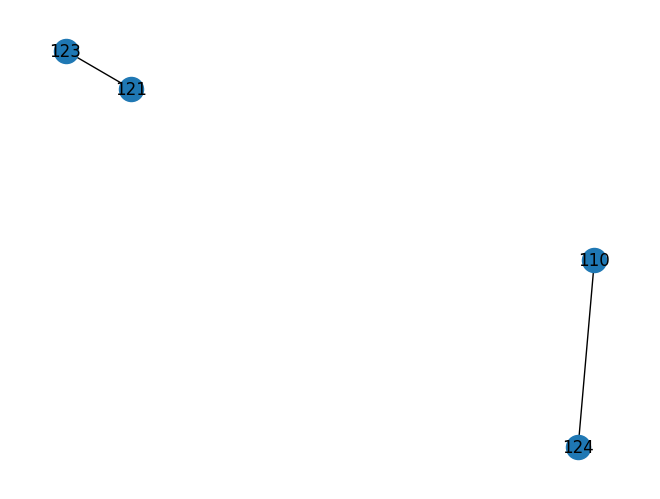

Performing global features query
Done with edge_df: 0.0005888938903808594
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  110  124     29.09   86.029616               0.583262   
1  123  121     26.58  155.254918               0.529596   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000107                1                       False   
1              0.000000                0                       False   

  definite_partner_width_delete  
0                          None  
1                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  110  124     29.09   86.029616               0.583262   
1  123  121     26.58  155.254918               0.529596   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000107     

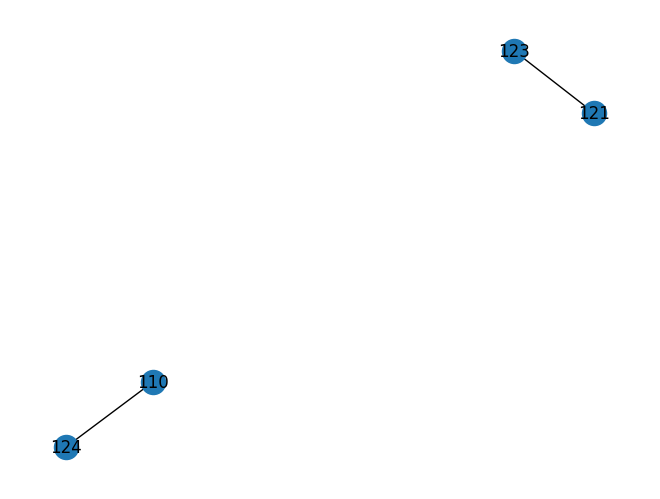

Performing node features query
Done with edge_df: 0.0005905628204345703
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  110  124     29.09   86.029616               0.583262   
1  123  121     26.58  155.254918               0.529596   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000107                1                       False   
1              0.000000                0                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  110  124     29.09   86.029616               0.583262   
1  123  121     26.58  155.254918               0.529596   

   synapse_density_diff  n_synapses_d

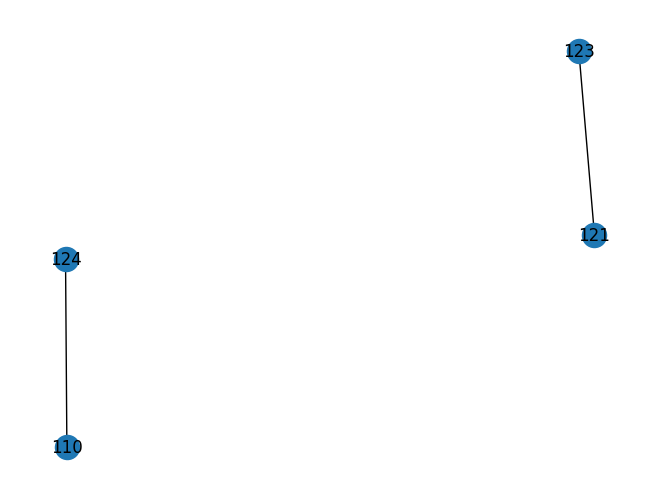

for upstream node 121, winning_node = 123, error_branches = [110 124]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (137.90260416815224) less than width_min(250)
Current node skip distance was 1427.364565567501 but max skip distance was 1427.364565567501
Current node skip distance was 1741.2608507006335 but max skip distance was 2135.2728824972623
Current node skip distance was 1422.7823118140598 but max skip distance was 1422.7823118140598
Current node skip distance was 1446.194460318215 but max skip distance was 1446.194460318215
Current node skip distance was 2135.2728824972623 but max skip distance was 2135.2728824972623
Current node skip distance was 1556.065657251308 but max skip distance was 1556.065657251308
Current node skip distance was 1550.1241718840056 but max skip distance was 2142.1063878645527
Current node skip distance was 1449.235144763992 but max skip distance was 1449.235144763992
Current node skip distance was 1906.2663347269172 but max s

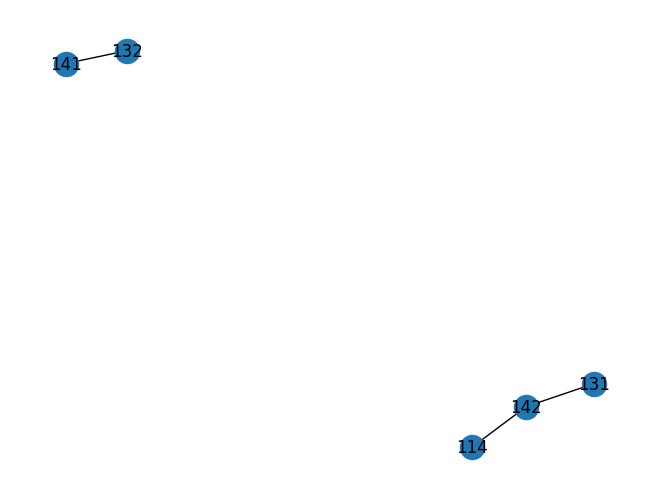

Performing global features query
Done with edge_df: 0.0006663799285888672
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  114  142     14.12   31.335422               0.370529   
1  131  142     14.97   14.582371               0.215027   
2  141  132      6.99   82.430546               0.464387   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0                   0.0                0                       None   
1                   0.0                0                       None   
2                   0.0                0                      False   

  definite_partner_width_delete  
0                          None  
1                          None  
2                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  114  142     14.12   31.335422               0.370529   

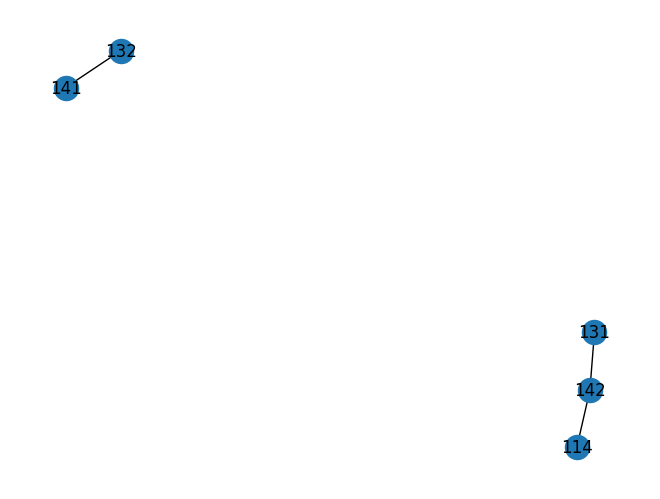

Performing node features query
Done with edge_df: 0.0007598400115966797
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  114  142     14.12   31.335422               0.370529   
1  131  142     14.97   14.582371               0.215027   
2  141  132      6.99   82.430546               0.464387   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0                   0.0                0                       None   
1                   0.0                0                       None   
2                   0.0                0                      False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None                   None  
2                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff

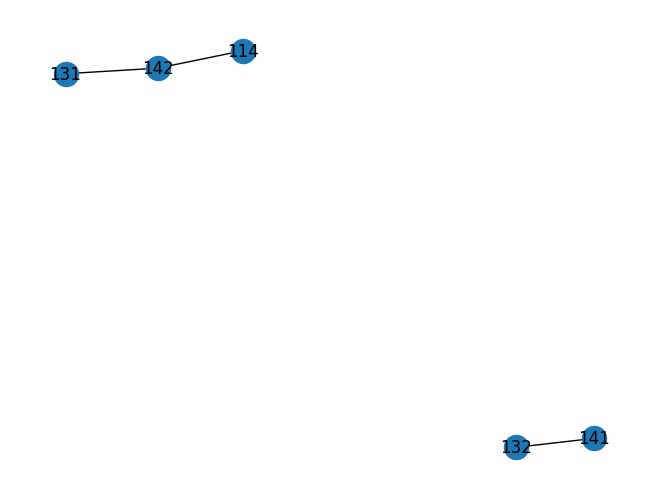

for upstream node 132, winning_node = 141, error_branches = [114 131 142]
Inside high_degree_false_positive_low_sibling_filter ****
Not exactly 2 downstream errors so returning
Current node skip distance was 1844.3747246878115 but max skip distance was 1906.2663347269172
Current node skip distance was 1482.9948556592358 but max skip distance was 1482.9948556592358
Current node skip distance was 1478.8568428018189 but max skip distance was 1478.8568428018189
Current node skip distance was 1984.014822069179 but max skip distance was 1984.014822069179
Current node skip distance was 1438.6446821350578 but max skip distance was 1438.6446821350578
Current node skip distance was 2300 but max skip distance was 2300.0
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0009143352508544922
Performing Edge Query
After edge filter, # of rows = 7
Exporting the edges
Delete

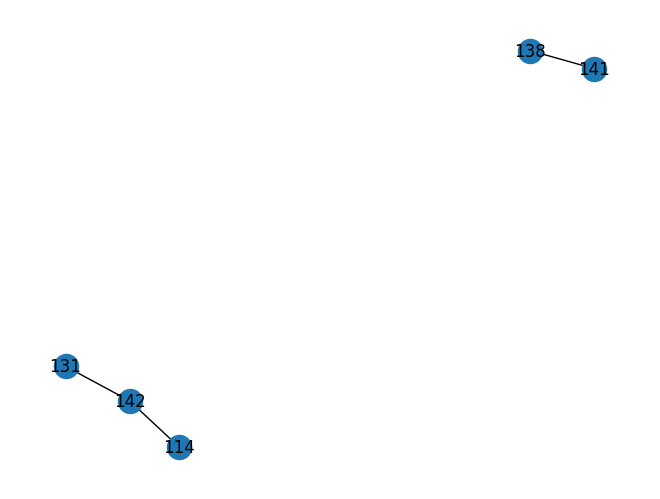

Performing global features query
Done with edge_df: 0.0006277561187744141
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  114  142     14.12   31.335422               0.370529   
1  131  142     14.97   14.582371               0.215027   
2  141  138      8.36  120.028032               0.558007   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0                   0.0                0                       None   
1                   0.0                0                       None   
2                   0.0                0                      False   

  definite_partner_width_delete  
0                          None  
1                          None  
2                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  114  142     14.12   31.335422               0.370529   

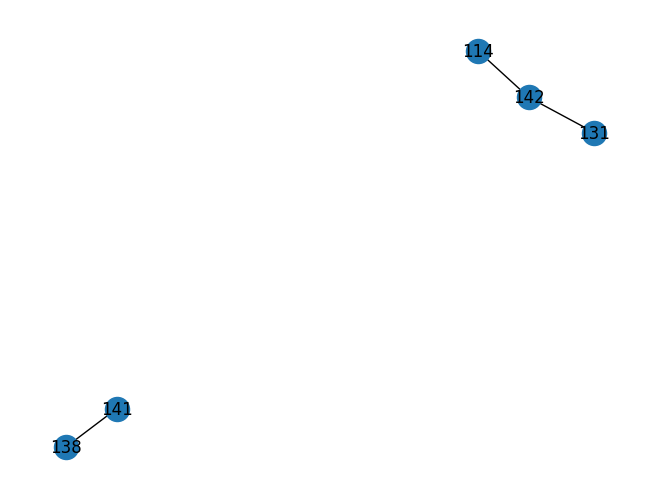

Performing node features query
Done with edge_df: 0.0011136531829833984
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  114  142     14.12   31.335422               0.370529   
1  131  142     14.97   14.582371               0.215027   
2  141  138      8.36  120.028032               0.558007   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0                   0.0                0                       None   
1                   0.0                0                       None   
2                   0.0                0                      False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None                   None  
2                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff

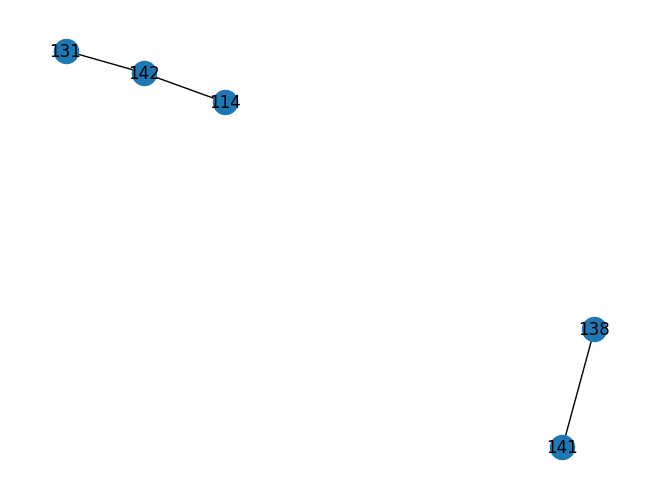

for upstream node 138, winning_node = 141, error_branches = [114 131 142]
Inside high_degree_false_positive_low_sibling_filter ****
Not exactly 2 downstream errors so returning
Current node skip distance was 1562.8057260398737 but max skip distance was 1562.8057260398737
Current node skip distance was 1388.4752639608032 but max skip distance was 1388.4752639608032
Current node skip distance was 1837.6542011364807 but max skip distance was 1844.3747246878115
Current node skip distance was 1507.6908627035161 but max skip distance was 1507.6908627035161
Current node skip distance was 1829.4403823438415 but max skip distance was 1837.6542011364807
Current node skip distance was 1421.724095731764 but max skip distance was 1579.3963617969853
Current node skip distance was 1558.868122651933 but max skip distance was 1558.868122651933
Current node skip distance was 1563.5533146529701 but max skip distance was 1563.5533146529701
Current node skip distance was 1476.1917328180928 but max skip dis

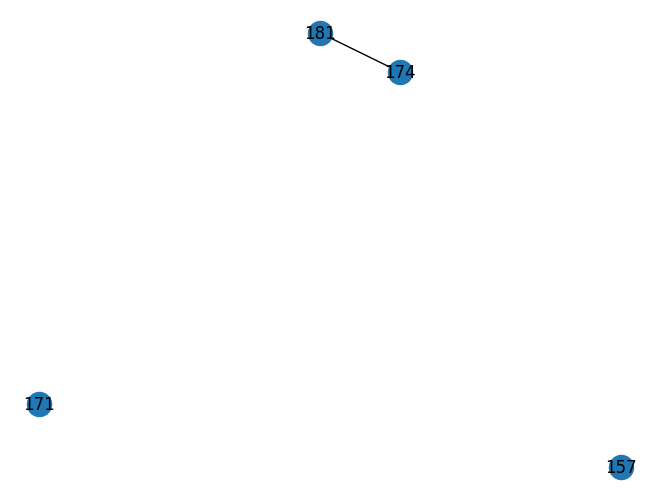

Performing global features query
Done with edge_df: 0.0005347728729248047
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  174  181      6.21    3.987706               0.019056   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0                   0.0                0                       False   

   definite_partner_width_delete  
0                          False  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  174  181      6.21    3.987706               0.019056   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0                   0.0                0                       False   

   definite_partner_width_delete  
0                          False  


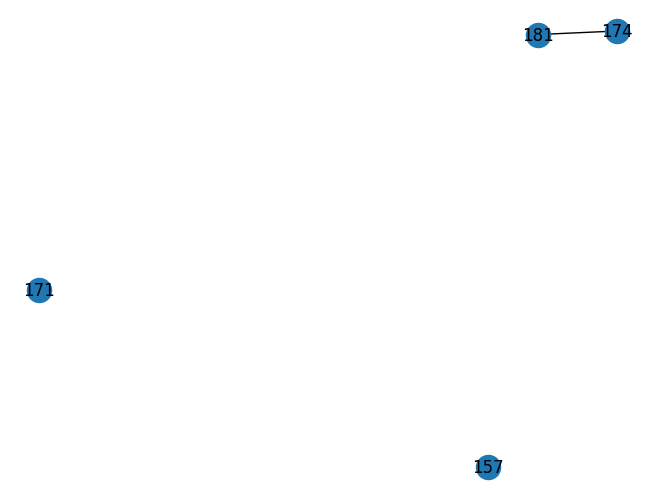

Performing node features query
Done with edge_df: 0.0007801055908203125
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  174  181      6.21    3.987706               0.019056   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0                   0.0                0                       False   

   definite_partner_width_delete above_threshold_delete  
0                          False                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  174  181      6.21    3.987706               0.019056   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0                   0.0                0                       False   

   definite_partner_width_delete above_threshold_delete  
0                          False                   None  


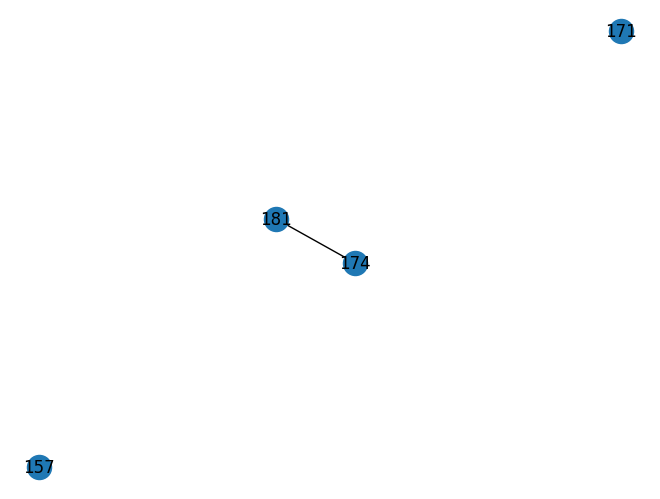

Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1839.1475043627702 but max skip distance was 1839.1475043627702
Current node skip distance was 1512.829721361837 but max skip distance was 1839.1475043627702
Current node skip distance was 1545.639811575495 but max skip distance was 1545.639811575495
Current node skip distance was 1689.8133365029908 but max skip distance was 1689.8133365029908
Current node skip distance was 1547.5571932935732 but max skip distance was 1689.8133365029908
Current node skip distance was 1891.5160741296565 but max skip distance was 1891.5160741296565
Current node skip distance was 1528.327643905881 but max skip distance was 1528.327643905881
Current node skip distance was 1443.4813042766386 but max skip distance was 1891.5160741296565
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6

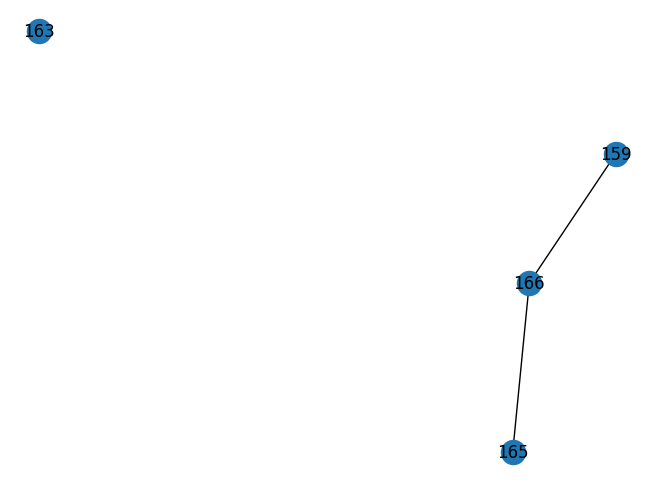

Performing global features query
Done with edge_df: 0.0007636547088623047
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  159  166     37.49   13.615988               0.163892   
1  166  165     62.35    3.027633               0.045573   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000029                1                       None   
1              0.000117                0                       None   

  definite_partner_width_delete  
0                          None  
1                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  159  166     37.49   13.615988               0.163892   
1  166  165     62.35    3.027633               0.045573   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000029         

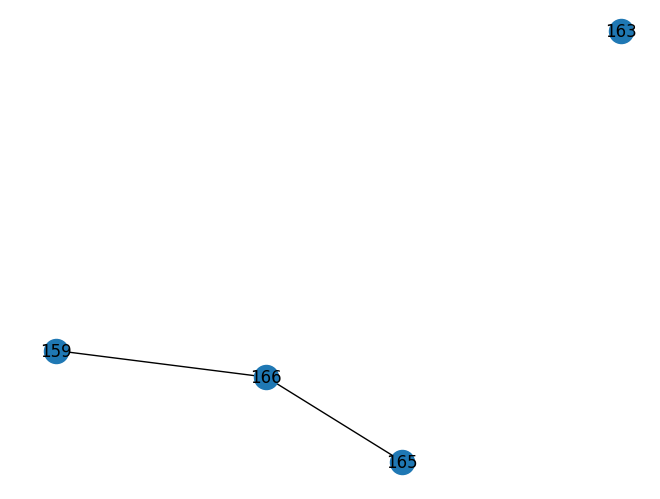

Performing node features query
Done with edge_df: 0.0007636547088623047
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  159  166     37.49   13.615988               0.163892   
1  166  165     62.35    3.027633               0.045573   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000029                1                       None   
1              0.000117                0                       None   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None                   True  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  159  166     37.49   13.615988               0.163892   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000029      

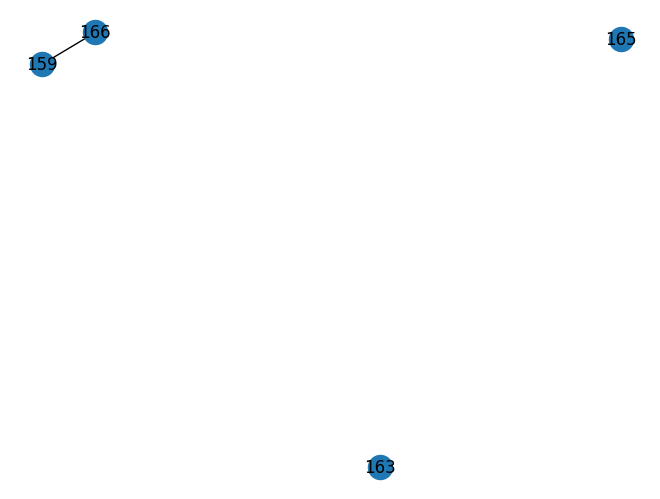

Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1456.096439990625 but max skip distance was 1456.096439990625
Current node skip distance was 1438.7677292204708 but max skip distance was 1438.7677292204708
Current node skip distance was 1475.5458016004027 but max skip distance was 1823.5915015780708
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.00103759765625
Performing Edge Query
After edge filter, # of rows = 5
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  160  165    150.60   24.518042               0.269567   
1  160  175      5.52   66.708406               0.733434   
2  160  168    145.72   16.822562               0.226930   
3  165  175     32.25   91.226447               1.373158   
4  165  1

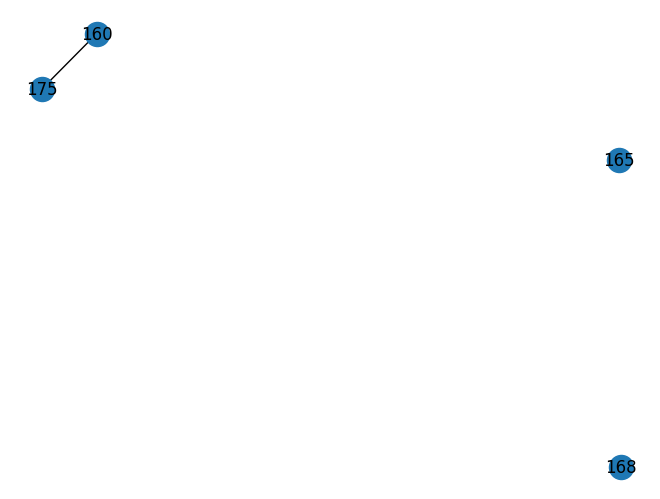

Performing global features query
Done with edge_df: 0.0005497932434082031
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  160  175      5.52   66.708406               0.733434   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000058                1                       False   

  definite_partner_width_delete  
0                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  160  175      5.52   66.708406               0.733434   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000058                1                       False   

  definite_partner_width_delete  
0                          None  


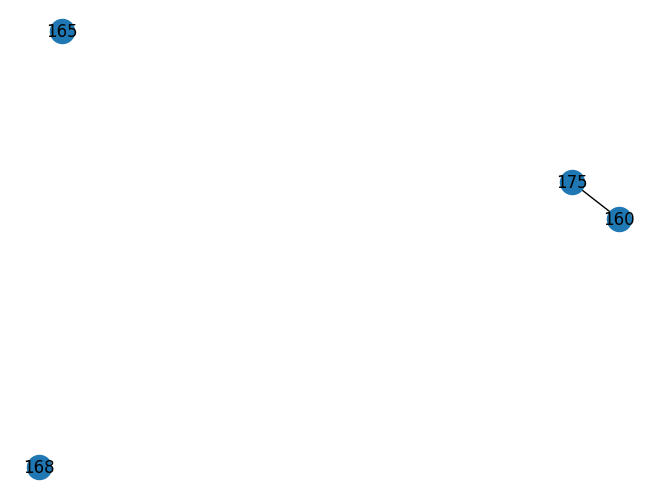

Performing node features query
Done with edge_df: 0.00067138671875
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  160  175      5.52   66.708406               0.733434   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000058                1                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  160  175      5.52   66.708406               0.733434   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000058                1                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  


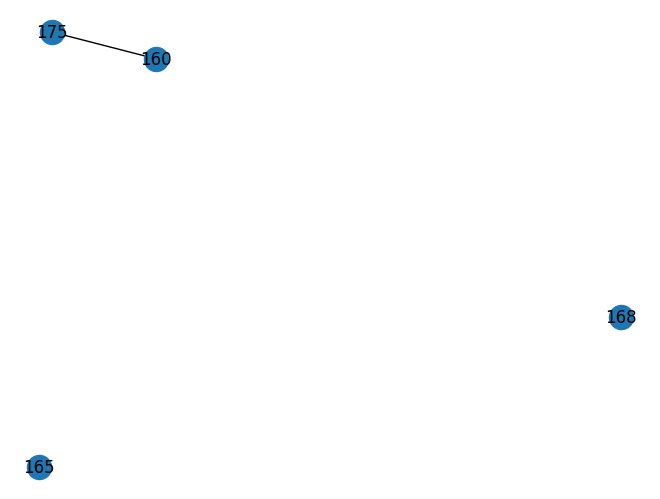

Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1499.8793134527978 but max skip distance was 1499.8793134527978
Current node skip distance was 1620.256694044604 but max skip distance was 1620.256694044604
Current node skip distance was 1433.8237379512698 but max skip distance was 1545.639811575495
Current node skip distance was 2038.576234978638 but max skip distance was 2300.0
Current node skip distance was 1823.5915015780708 but max skip distance was 1823.5915015780708
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0016705989837646484
Performing Edge Query
After edge filter, # of rows = 6
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  176  180      6.40    5.328512               0.092817   
1  176  

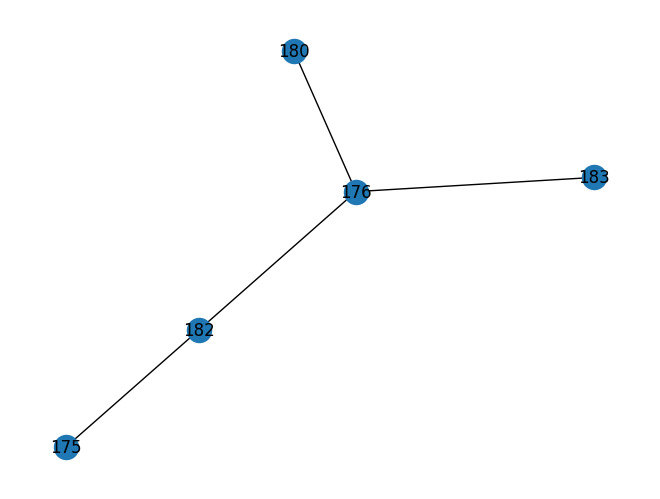

Performing global features query
Done with edge_df: 0.0006744861602783203
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  176  180      6.40    5.328512               0.092817   
1  176  182     54.70   44.139437               0.768864   
2  176  183      8.95    4.869116               0.084815   
3  182  175     64.98   56.113901               0.355913   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000000                0                       None   
1              0.000243                1                       None   
2              0.000000                0                       None   
3              0.000243                1                       None   

  definite_partner_width_delete  
0                          None  
1                          None  
2                          None  
3       

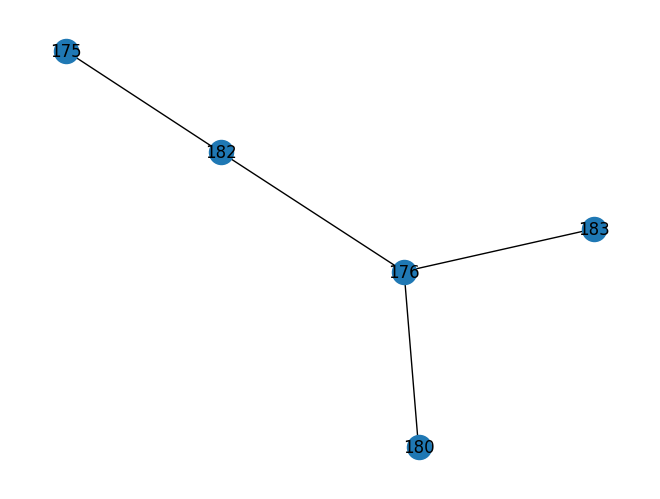

Performing node features query
Done with edge_df: 0.0007760524749755859
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  176  180      6.40    5.328512               0.092817   
1  176  182     54.70   44.139437               0.768864   
2  176  183      8.95    4.869116               0.084815   
3  182  175     64.98   56.113901               0.355913   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000000                0                       None   
1              0.000243                1                       None   
2              0.000000                0                       None   
3              0.000243                1                       None   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None   

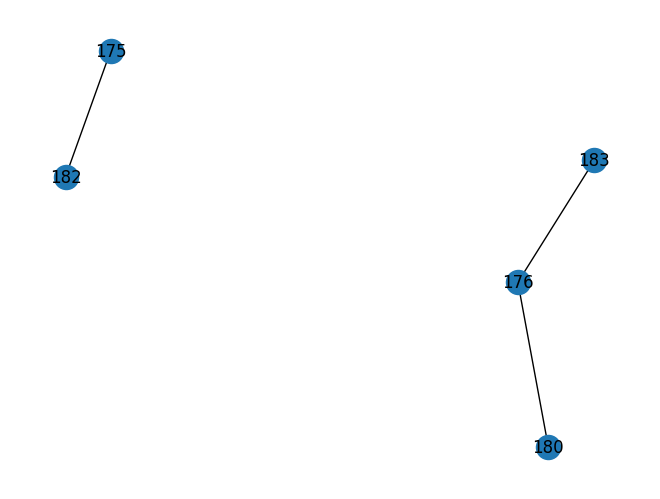

for upstream node 175, winning_node = 182, error_branches = [176 180 183]
Inside high_degree_false_positive_low_sibling_filter ****
Not exactly 2 downstream errors so returning
Current node skip distance was 1405.8692599063027 but max skip distance was 1405.8692599063027
Current node skip distance was 2300 but max skip distance was 2300.0
Current node skip distance was 1659.4564136143172 but max skip distance was 1659.4564136143172
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0008425712585449219
Performing Edge Query
After edge filter, # of rows = 2
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  176  182     54.70   44.139437               0.768864   
1  176  183      8.95    4.869116               0.084815   
2  176  179    165.29   60.860917               0.514595   


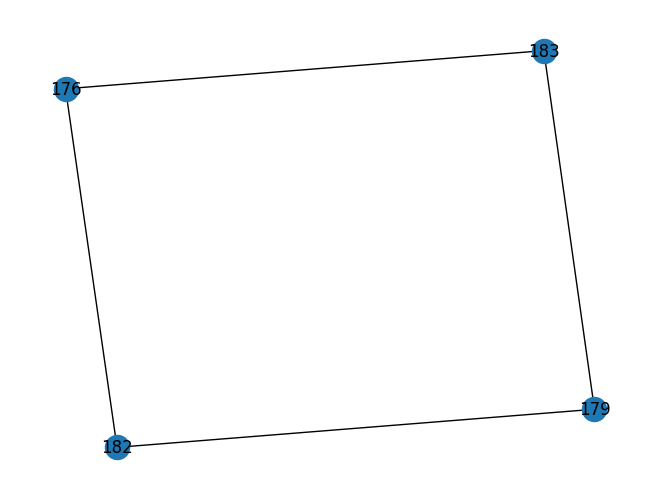

Performing global features query
Done with edge_df: 0.0006535053253173828
Performing Edge Query
After edge filter, # of rows = 2
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  176  182     54.70   44.139437               0.768864   
1  176  183      8.95    4.869116               0.084815   
2  182  179     57.59   16.721480               0.141385   
3  183  179     22.87   65.730032               0.555765   

   synapse_density_diff  n_synapses_diff  definite_partner_width_delete  \
0              0.000243                1                           True   
1              0.000000                0                          False   
2              0.000243                1                          False   
3              0.000000                0                           True   

  definite_partner_sk_delete  
0                       None  
1                       None  
2                       None  


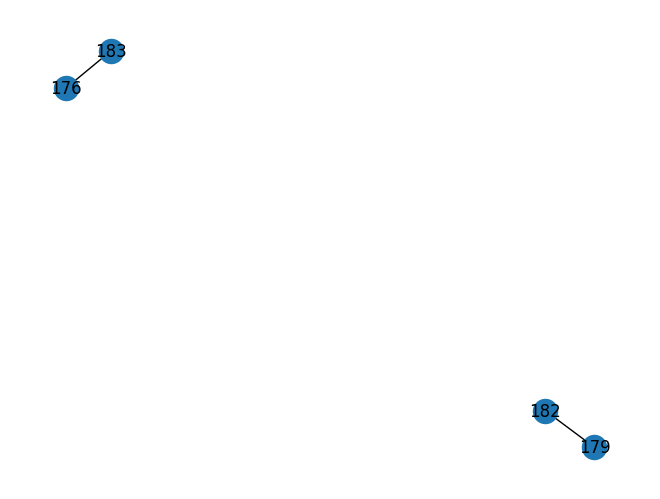

Performing node features query
Done with edge_df: 0.0005931854248046875
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  176  183      8.95    4.869116               0.084815   
1  182  179     57.59   16.721480               0.141385   

   synapse_density_diff  n_synapses_diff  definite_partner_width_delete  \
0              0.000000                0                          False   
1              0.000243                1                          False   

  definite_partner_sk_delete above_threshold_delete  
0                       None                   None  
1                       None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  176  183      8.95    4.869116               0.084815   
1  182  179     57.59   16.721480               0.141385   

   synapse_density_diff  n_synapses_d

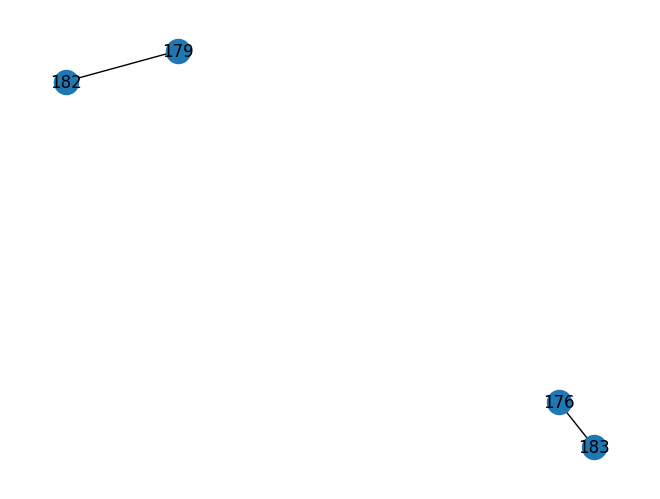

for upstream node 179, winning_node = 182, error_branches = [176 183]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (101.54805929174576) less than width_min(250)
Current node skip distance was 1428.0713915564047 but max skip distance was 1428.0713915564047
Current node skip distance was 2027.4124032472496 but max skip distance was 2300.0
Current node skip distance was 1589.7835803822734 but max skip distance was 1589.7835803822734
Current node skip distance was 1385.5812786224683 but max skip distance was 1385.5812786224683
Current node skip distance was 2195.5669470130083 but max skip distance was 2195.5669470130083
Current node skip distance was 1907.1869472675644 but max skip distance was 1907.1869472675644
limb_branch_dict_to_cancel = {'L3': array([105, 115, 102, 104, 145, 178, 147, 177, 150, 153, 156, 157, 152,
       173, 168, 167, 179, 182, 184, 185, 187, 189, 186, 188,  96,  65,
        64,  67,  58,  37,  71,  74,  77,  45,  46,  85,  88,  57, 154,
 

In [48]:
neuron_obj_proof = npu.auto_proof_stage(
    neuron_obj_axon,
    mesh_decimated = mesh_decimated,
    calculate_after_proof_stats = False,
)

In [52]:
_ = npu.after_auto_proof_stats(
    neuron_obj_proof,
    store_in_obj = True,
)


Working on compartment basal---
Compartment limb stats = {'n_limbs': 4, 'soma_angle_max': 125.96, 'soma_angle_min': 90.34}

Working on compartment apical_total---
Compartment limb stats = {'n_limbs': 1, 'soma_angle_max': 31.75, 'soma_angle_min': 31.75}

Working on compartment axon---
Compartment limb stats = {'n_limbs': 1, 'soma_angle_max': 156.14, 'soma_angle_min': 156.14}

Working on compartment dendrite---
Compartment limb stats = {'n_limbs': 5, 'soma_angle_max': 125.96, 'soma_angle_min': 31.75}


# Saving off the autoproofread neuron

In [53]:
vdi.save_neuron_obj_auto_proof(
    neuron_obj_proof,
)

Total time for soma meshes compression = 0.30582141876220703
Total time for insignificant_limbs,inside_pieces,non_soma_touching_meshes,not_processed_soma_containing_meshes compression = 0.5940961837768555
Total time for limb_meshes compression = 1.7414429187774658
    Starting Limb Correspondence Compression
Total time for new_limb_correspondence compression = 13.151065826416016
Cleared mesh: <trimesh.Trimesh(vertices.shape=(15723, 3), faces.shape=(38825, 3))>:140289043424352
Cleared mesh: <trimesh.Trimesh(vertices.shape=(4348, 3), faces.shape=(8941, 3))>:140289043426608
Cleared mesh: <trimesh.Trimesh(vertices.shape=(1586, 3), faces.shape=(3510, 3))>:140289043426992
Cleared mesh: <trimesh.Trimesh(vertices.shape=(808, 3), faces.shape=(1812, 3))>:140288300958672
Cleared mesh: <trimesh.Trimesh(vertices.shape=(806, 3), faces.shape=(1809, 3))>:140288300961312
Cleared mesh: <trimesh.Trimesh(vertices.shape=(805, 3), faces.shape=(1808, 3))>:140289044252128
Cleared mesh: <trimesh.Trimesh(vertic

'864691134917511946_auto_proof.pbz2'

# Plotting the final neuron

In [ ]:
from neurd import synapse_utils as syu

In [ ]:
from datasci_tools import ipyvolume_utils as ipvu
ipvu.plot_objects(
    neuron_obj_axon.mesh,
    meshes = [neuron_obj_proof.mesh],
    meshes_colors="red"
)

In [ ]:
syu.plot_synapses(neuron_obj_proof)

In [ ]:
syu.plot_synapses_error_from_neuron_obj(neuron_obj_proof)    

In [ ]:
syu.plot_synapses_valid_from_neuron_obj(neuron_obj_proof)  

In [55]:
nviz.plot_compartments(neuron_obj_proof)

[autoreload of neurd.vdi_default failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/extensions/autoreload.py", line 273, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.8/dist-packages/IPython/extensions/autoreload.py", line 496, in superreload
    update_generic(old_obj, new_obj)
  File "/usr/local/lib/python3.8/dist-packages/IPython/extensions/autoreload.py", line 393, in update_generic
    update(a, b)
  File "/usr/local/lib/python3.8/dist-packages/IPython/extensions/autoreload.py", line 345, in update_class
    if update_generic(old_obj, new_obj):
  File "/usr/local/lib/python3.8/dist-packages/IPython/extensions/autoreload.py", line 393, in update_generic
    update(a, b)
  File "/usr/local/lib/python3.8/dist-packages/IPython/extensions/autoreload.py", line 305, in update_function
    setattr(old, name, getattr(new, name))
ValueError: segment_id_to_synapse_table_optimized_proofread() requires a code


 Working on visualization type: mesh


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

apical:blue
apical_shaft:aqua
apical_tuft:purple
basal:yellow
axon:red
oblique:green


Unlabeled: transparent green
